# Level one markdown cell collapse

In [ ]:
# 2022-12-09 iteration:
# Put boxes to learning curving
# Put big font loss plot code to pretrain block

# goal for 2022-12-08 iteration:
# Change the preceding underscore to a dot for the 'fit_on' cohort - done
    # This will be done with ACC

In [ ]:
 # run inpt_frame to concat with F1 object off the big font file set

In [119]:
%whos DataFrame

Variable                      Type         Data/Info
----------------------------------------------------
X                             DataFrame                  N:GEXP::COL<...>n[40 rows x 5000 columns]
X_test                        DataFrame                  N:GEXP::COL<...>n[14 rows x 5000 columns]
X_train                       DataFrame                  N:GEXP::COL<...>n[26 rows x 5000 columns]
dec                           DataFrame                  Labels  N:G<...>[995 rows x 5001 columns]
decoded                       DataFrame                  N:GEXP::COL<...>n[40 rows x 5000 columns]
decoded_labeled               DataFrame                  Labels  N:G<...>n[40 rows x 5001 columns]
df_to_clf                     DataFrame                  Labels     <...>\n[40 rows x 101 columns]
fig_stack                     DataFrame                             <...>n\n[640 rows x 2 columns]
file                          DataFrame                  Labels  N:G<...>[995 rows x 5001 columns]
fin

### Setup, notes

#### Code provenance

In [ ]:
# From box_and_whiskers_BRCA.ipynb
# that was first six-part overlay

In [ ]:
# Main goal is to convert the learning curve to a box curve - 
# The method to accomplish this will be to make stacked hue frame
    # Can run on BLCA (?)
    # Try distribution fitting?
    # Other feature sets / classifiers 
    # Want to ultimately extend the curves for five chohorts with
        # less than 100 samples ACC, UVM, MESO, etc
    # Try a multitple hold-out validation run (hold-in section)
        # Get meta-stats on this (?)

#### Imports

In [ ]:
# 2022-12-08 Thursday afternoon after the molecular engineering seminar
# Now its time for transfer training and the conversion of the lerning curves to box curves
# Primary goal review: swap the 'fit_on' underscore to a dot
    # Should probably try to put in a placeholder for the hold-in pre-split post-pre-train prior to fine-tune

# 2022-12-07
# Run one on box curve - This got to a BRCA-within embedding validation plot
# Goal is to max out 64G memory and crash the browser

In [ ]:
# resurrect the UMAP - not now
    # Also get some scatter plots going - no
    # and the RMSE and MSigDB - yes; later

In [ ]:
# Working out of Synthetic sample generation manuscript doc
# And corresponding figure draft google slides, companion doc, and PaperPile

In [3]:
import seaborn as sns
import pandas as pd
import glob as glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from statistics import mean
from statistics import stdev
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization, Activation, Layer
from tensorflow.keras import metrics, optimizers
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import Callback
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from matplotlib import rcParams # This is new; jam the labels up on the box star plot
# UMAP is missing (?)

#### Big Results Matrix

In [ ]:
brm = pd.read_csv('/Users/karlberb/Documents/work/GDAN_TMP/big_results_matrix.tsv',
                  sep = '\t',
                  index_col = 0)
print(len(brm))
owf1 = brm[brm.performance_metric == 'overall_weighted_f1']
del(brm)

In [ ]:
412,585

In [ ]:
c = 'ACC'

In [5]:
c = 'BRCA'

In [158]:
c

'BRCA'

In [352]:
c_owf1 = owf1[owf1.cohort == c]

In [353]:
c_owf1_sk = c_owf1[c_owf1.model.str.contains('skgrid')]

In [354]:
c_owf1_sk.sort_values('Mean') #

,cohort,model,performance_metric,Mean,Median,Std,StdMed,SEM,Count,Max,...,subtypes_defined_by_Histology,subtypes_defined_by_iCluster,subtypes_defined_by_COCA,subtypes_defined_by_Other,total_features,GEXP_features,CNVR_features,METH_features,MIR_features,MUTA_features
featureID,,,,,,,,,,,,,,,,,,,,,
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=brute,leaf_size=45...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=kd_tree,leaf_size=...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=kd_tree,leaf_size=...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=kd_tree,leaf_size=...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=brute,leaf_size=45...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skgrid_ACC_fbedeBIC_perplatformGEXP_ACC,ACC,"skgrid_LogisticRegression(C=0.01,max_iter=500,...",overall_weighted_f1,0.864,0.853,0.0680,0.0689,0.0152,20,1.000000,...,NaN,NaN,NaN,NaN,5,5,0,0,0,0
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_LogisticRegression(C=0.01,max_iter=500,...",overall_weighted_f1,0.864,0.863,0.0782,0.0782,0.0174,20,1.000000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.864,0.864,0.0645,0.0645,0.0144,20,1.000000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2


In [356]:
len(c_owf1_sk.model.unique()) # Looking for classifiers with two hyperparameters to make a heatmap

# Could lock a third HP then heatmap then remaining two

6209

In [358]:
c_owf1_sk[c_owf1_sk.model.str.contains('BernoulliNB')]

,cohort,model,performance_metric,Mean,Median,Std,StdMed,SEM,Count,Max,...,subtypes_defined_by_Histology,subtypes_defined_by_iCluster,subtypes_defined_by_COCA,subtypes_defined_by_Other,total_features,GEXP_features,CNVR_features,METH_features,MIR_features,MUTA_features
featureID,,,,,,,,,,,,,,,,,,,,,
skgrid_ACC_fbedeBIC_combined_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.335,0.351,0.0725,0.0741,0.0162,20,0.530920,...,NaN,NaN,NaN,NaN,5,3,0,1,1,0
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.647,0.614,0.1180,0.1220,0.0264,20,0.919658,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_fbedeBIC_perplatformCNVR_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.631,0.621,0.1100,0.1110,0.0247,20,0.842735,...,NaN,NaN,NaN,NaN,9,0,9,0,0,0
skgrid_ACC_fbedeBIC_perplatformGEXP_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,5,5,0,0,0,0
skgrid_ACC_fbedeBIC_perplatformMETH_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,8,0,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skgrid_ACC_rfe15_perplatformALL_ACC,ACC,skgrid_BernoulliNB(alpha=1.0)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.642,0.648,0.0649,0.0652,0.0145,20,0.746154,...,NaN,NaN,NaN,NaN,60,15,15,15,15,0
skgrid_ACC_rfe15_perplatformCNVR_ACC,ACC,skgrid_BernoulliNB(alpha=1.0)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.670,0.681,0.0821,0.0828,0.0183,20,0.802083,...,NaN,NaN,NaN,NaN,15,0,15,0,0,0
skgrid_ACC_rfe15_perplatformGEXP_ACC,ACC,skgrid_BernoulliNB(alpha=1.0)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,15,0,0,0,0


In [360]:
len(c_owf1_sk[c_owf1_sk.model.str.contains('BernoulliNB')].model.unique())

130

In [ ]:
c_owf1_sk[c_owf1_sk.model.str.contains('BernoulliNB')].model.unique() # Could use feature set as heatmap axis

In [ ]:
c_owf1_sk[c_owf1_sk.model.str.contains('GaussianProcess')].model.unique() # Only has kernel varying

In [ ]:
c_owf1_sk[c_owf1_sk.model.str.contains('DecisionTree')].model.unique() # criterion is binary, then max depth and sample split across
                                                                        # feature sets

In [ ]:
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', # Here
                                          splitter='best', max_depth=None, # Here
                                          min_samples_split=2, # Here
                                          min_samples_leaf=1,
                                          min_weight_fraction_leaf=0.0,
                                          max_features=None, random_state=None,
                                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                                          class_weight=None, ccp_alpha=0.0)

In [ ]:
c_owf1_sk[c_owf1_sk.model.str.contains('ExtraTrees')].model.unique() # criterion is binary, then max depth and sample split across
                                                                        # feature sets

In [ ]:
class sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, *, criterion='gini', # 96 is default (with gini)
                                            max_depth=None, min_samples_split=2,
                                            min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                            max_features='sqrt', max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, bootstrap=False,
                                            oob_score=False, n_jobs=None, random_state=None,
                                            verbose=0, warm_start=False, class_weight=None,
                                            ccp_alpha=0.0, max_samples=None)[source]

In [368]:
c_owf1_sk[c_owf1_sk.model.str.contains('KNeighbors')].model.unique() # algo, leaf_size, n_neighbs

array(['skgrid_KNeighbors(algorithm=auto,leaf_size=15,n_neighbors=1,p=1)|skgrid_ACC.tsv_skgrid_ACC_fbedeBIC_combined|ACC.tsv_skgrid_ACC_fbedeBIC_combined|2021-01-13|c',
       'skgrid_KNeighbors(algorithm=auto,leaf_size=15,n_neighbors=1,p=1)|skgrid_ACC.tsv_skgrid_ACC_fbedeBIC_perplatformALL|ACC.tsv_skgrid_ACC_fbedeBIC_perplatformALL|2021-01-13|c',
       'skgrid_KNeighbors(algorithm=auto,leaf_size=15,n_neighbors=1,p=1)|skgrid_ACC.tsv_skgrid_ACC_fbedeBIC_perplatformCNVR|ACC.tsv_skgrid_ACC_fbedeBIC_perplatformCNVR|2021-01-13|c',
       ...,
       'skgrid_KNeighbors(algorithm=kd_tree,leaf_size=45,n_neighbors=7,p=5)|skgrid_ACC.tsv_skgrid_ACC_rfe15_perplatformGEXP|ACC.tsv_skgrid_ACC_rfe15_perplatformGEXP|2021-01-13|c',
       'skgrid_KNeighbors(algorithm=kd_tree,leaf_size=45,n_neighbors=7,p=5)|skgrid_ACC.tsv_skgrid_ACC_rfe15_perplatformMETH|ACC.tsv_skgrid_ACC_rfe15_perplatformMETH|2021-01-13|c',
       'skgrid_KNeighbors(algorithm=kd_tree,leaf_size=45,n_neighbors=7,p=5)|skgrid_ACC.tsv_skgr

In [370]:
c_owf1_sk[c_owf1_sk.model.str.contains('BernoulliNB')].sort_values('Mean')

,cohort,model,performance_metric,Mean,Median,Std,StdMed,SEM,Count,Max,...,subtypes_defined_by_Histology,subtypes_defined_by_iCluster,subtypes_defined_by_COCA,subtypes_defined_by_Other,total_features,GEXP_features,CNVR_features,METH_features,MIR_features,MUTA_features
featureID,,,,,,,,,,,,,,,,,,,,,
skgrid_ACC_rfe15_perplatformMIR_ACC,ACC,skgrid_BernoulliNB(alpha=0.5)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,0,0,0,15,0
skgrid_ACC_fbedeBIC_perplatformGEXP_ACC,ACC,skgrid_BernoulliNB(alpha=0.7)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,5,5,0,0,0,0
skgrid_ACC_rfe15_perplatformMIR_ACC,ACC,skgrid_BernoulliNB(alpha=0.6)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,0,0,0,15,0
skgrid_ACC_rfe15_perplatformMETH_ACC,ACC,skgrid_BernoulliNB(alpha=0.6)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,0,0,15,0,0
skgrid_ACC_rfe15_perplatformGEXP_ACC,ACC,skgrid_BernoulliNB(alpha=0.6)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,skgrid_BernoulliNB(alpha=0.6)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.669,0.668,0.1030,0.1030,0.0232,20,0.918343,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_rfe15_perplatformCNVR_ACC,ACC,skgrid_BernoulliNB(alpha=1.0)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.670,0.681,0.0821,0.0828,0.0183,20,0.802083,...,NaN,NaN,NaN,NaN,15,0,15,0,0,0
skgrid_ACC_rfe15_perplatformALL_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.670,0.676,0.0694,0.0696,0.0155,20,0.802083,...,NaN,NaN,NaN,NaN,60,15,15,15,15,0


In [373]:
c_owf1_sk[c_owf1_sk.model.str.contains('ExtraTrees')].sort_values('Mean')

,cohort,model,performance_metric,Mean,Median,Std,StdMed,SEM,Count,Max,...,subtypes_defined_by_Histology,subtypes_defined_by_iCluster,subtypes_defined_by_COCA,subtypes_defined_by_Other,total_features,GEXP_features,CNVR_features,METH_features,MIR_features,MUTA_features
featureID,,,,,,,,,,,,,,,,,,,,,
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=gini,n_estimators=...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=gini,n_estimators=...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_ExtraTrees(criterion=gini,n_estimators=...",overall_weighted_f1,0.857,0.863,0.0703,0.0706,0.0157,20,1.00000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.862,0.868,0.0715,0.0717,0.0159,20,1.00000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.864,0.864,0.0645,0.0645,0.0144,20,1.00000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2


In [ ]:
# combine both grids into single heatmap to normalize colors (?)

In [159]:
input_to_function = c_owf1_sk
m_lst = []
for m in input_to_function.sort_values('Mean', ascending = False).model:
    m_lst.append(m.split('(')[0])
set(m_lst)
res_list = [] # *
for item in m_lst: 
    if item not in res_list: 
        res_list.append(item)
# print(file.index.name)
res_list

NameError: name 'c_owf1_sk' is not defined

In [200]:
feats = pd.read_csv('/Users/karlberb/Documents/work/GDAN_TMP/feature_lists.tsv',
                    sep = '\t', index_col = 0)

In [245]:
feats

,TCGA_Projects,Features
Feature_Set_ID,,
CF_ACC_All_Top_100,ACC,"[""N:GEXP::RERG:85004:"",""N:METH:cg18873957:NA:N..."
CF_ACC_All_Top_50,ACC,"[""N:GEXP::RERG:85004:"",""N:METH:cg18873957:NA:N..."
CF_ACC_All_Top_10,ACC,"[""N:GEXP::RERG:85004:"",""N:METH:cg18873957:NA:N..."
CF_ACC_All_Top_5,ACC,"[""N:GEXP::RERG:85004:"",""N:METH:cg18873957:NA:N..."
CF_ACC_All_Top_1,ACC,"[""N:GEXP::RERG:85004:""]"
...,...,...
jadbio_GEA_MULTIDATATYPE_cumulative_feature_set23,"[""GEA""]","[""N:GEXP::MLH1:4292:"",""N:GEXP::DDX27:55661:"",""..."
jadbio_GEA_MULTIDATATYPE_cumulative_feature_set24,"[""GEA""]","[""N:GEXP::MLH1:4292:"",""N:GEXP::DDX27:55661:"",""..."
jadbio_GEA_MULTIDATATYPE_cumulative_feature_set25,"[""GEA""]","[""N:GEXP::MLH1:4292:"",""N:GEXP::DDX27:55661:"",""..."


In [204]:
feats.TCGA_Projects.unique()

array(['ACC', 'BLCA', 'BRCA', 'CESC', 'COADREAD', 'ESCC', 'GEA', 'HNSC',
       'KIRCKICH', 'KIRP', 'LGGGBM', 'LIHCCHOL', 'LUAD', 'LUSC', 'MESO',
       'OV', 'PAAD', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'TGCT', 'THCA',
       'THYM', 'UCEC', 'UVM', '["BLCA"]', '["BRCA"]', '["CESC"]',
       '["COADREAD"]', '["ESCC"]', '["GEA"]', '["HNSC"]', '["KIRCKICH"]',
       '["KIRP"]', '["LGGGBM"]', '["LUAD"]', '["LUSC"]', '["MESO"]',
       '["OV"]', '["PAAD"]', '["PCPG"]', '["PRAD"]', '["SARC"]',
       '["SKCM"]', '["TGCT"]', '["THCA"]', '["THYM"]', '["UCEC"]',
       '["LIHCCHOL"]', '["ACC"]', '["UVM"]'], dtype=object)

In [247]:
feats[feats.index == 'skgrid_BRCA_fbedeBIC_perplatformGEXP'] # * fall back

,TCGA_Projects,Features
Feature_Set_ID,,
skgrid_BRCA_fbedeBIC_perplatformGEXP,"[""BRCA""]","[""N:GEXP::FOXC1:2296:"",""N:GEXP::CENPA:1058:"",""..."


In [ ]:
# Tuned-model heatmap


In [ ]:
# Big results matrix feature set notes:

    # Run Extra Trees (ACC)
     # Logistic (LGGGBM)

In [ ]:
# Goal is to run an intersection MAD 5k feature set to support transfer learning
# and fine-tuning on 40 samples

# Ultimately a method to determine the generalizabilty of synthetic data generated from a small ~40
    # sample set
    
    # How to know if synthetic data from limited size sample set is good?

# archive notes:
    # Box-and-whisker
    # husl and hsl color palletes - should all still work

### Feature sets
For dialed-in embedding quality clf F1 box plots

#### Produce GEXP file set

In [ ]:
all_paths = sorted(glob.glob('/Users/karlberb/Documents/work/GDAN_TMP/TMP_v12_20210228/*.tsv'))
cv_folds = (
    glob.glob(
        '/Users/karlberb/Documents/work/GDAN_TMP/TMP_v12_20210228/*CVfolds_5FOLD*.tsv'))

In [ ]:
df = pd.read_csv(
    '/Users/karlberb/Documents/work/GDAN_TMP/TMP_v12_20210228/ACC_v12_20210228.tsv',
    sep="\t", index_col=0)
col_ndx = df.columns[1:]
first_two = []
for i in col_ndx:
    plc_one_two = i.split(':')
    first_two.append(plc_one_two[0] + ':' + plc_one_two[1])
datatype_prefixes = list(set(first_two))

In [ ]:
datatype_prefixes

In [ ]:
['B:MUTA', 'N:METH', 'N:GEXP', 'I:CNVR', 'N:MIR']

In [ ]:
# GEXP production, extract gene expression from the v12 TMP molecular files 
for pth in molecular_files:
    file = pd.read_csv(pth,
        sep="\t", index_col=0)
    col_ndx = file.columns[1:]
    dtyp_list = [i for i in col_ndx if i.startswith(datatype_prefixes[2])]
    print(file.index.name, len(dtyp_list))
    dtyp_list = ['Labels'] + dtyp_list
    file = file.loc[:, dtyp_list]
    file.to_csv('i_o/GEXP/' +
                file.index.name + '_GEXP.tsv', sep = '\t')

In [67]:
# Read a gexp-only file, this is input to the intersection function and the within-cohort MAD functions
for g_path in sorted(glob.glob('GEXP/*.tsv')):    
    print(g_path)
    g_file = pd.read_csv(g_path, sep ='\t', index_col = 0)
    break

GEXP/ACC_GEXP.tsv


In [ ]:
# across features from the intersection folder
# within fetures direct from the GEXP folder

#### GEXP_intersection
Including LGGGBM yields ~12k common gexp features across n = 26 TCGA cohorts

In [107]:
# gexp_cols = [] # Get intersection of GEXP across TCGA
feat_lists = {}

lol_inline = []
for gexp_path in sorted(glob.glob('GEXP/*.tsv')):
    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    # feat_lists[gexp_file.index.name] = gexp_file.columns[1:]
    
    lol_inline.append(gexp_file.columns[1:])
    
intrsct = set.intersection(*map(set,lol_inline))
    
# lol = []
# for i in feat_lists:
#     print(i)
#     lol.append(list(feat_lists[i]))    
    
    
    # cols_n = list(gexp_file.columns[1:])
    # gexp_cols = gexp_cols + list(gexp_file.columns[1:])

GEXP/ACC_GEXP.tsv
GEXP/BLCA_GEXP.tsv
GEXP/BRCA_GEXP.tsv
GEXP/CESC_GEXP.tsv
GEXP/COADREAD_GEXP.tsv
GEXP/ESCC_GEXP.tsv
GEXP/GEA_GEXP.tsv
GEXP/HNSC_GEXP.tsv
GEXP/KIRCKICH_GEXP.tsv
GEXP/KIRP_GEXP.tsv
GEXP/LGGGBM_GEXP.tsv
GEXP/LIHCCHOL_GEXP.tsv
GEXP/LUAD_GEXP.tsv
GEXP/LUSC_GEXP.tsv
GEXP/MESO_GEXP.tsv
GEXP/OV_GEXP.tsv
GEXP/PAAD_GEXP.tsv
GEXP/PCPG_GEXP.tsv
GEXP/PRAD_GEXP.tsv
GEXP/SARC_GEXP.tsv
GEXP/SKCM_GEXP.tsv
GEXP/TGCT_GEXP.tsv
GEXP/THCA_GEXP.tsv
GEXP/THYM_GEXP.tsv
GEXP/UCEC_GEXP.tsv
GEXP/UVM_GEXP.tsv


In [109]:
len(intrsct)

12339

In [112]:
ntrsct_list = list(intrsct) # Convert intersection dict to list

In [ ]:
lbld_ntrsct_list = ['Labels'] + ntrsct_list # Add labels column to intersection list for extraction

In [120]:
ls # GEXP_intersection/ is the target here

ACC_archive/                  dim10/
GEXP/                         dim100_run0/
GEXP_MAD_5k_across/           figure_five/
GEXP_MAD_5k_across_no_LGGGBM/ latent feature inspect/
GEXP_MAD_5k_within/           latent_feature_objects/
GEXP_intersection/            learning_curves/
GEXP_intersection_no_LGGGBM/  loss_plots/
PDF_out/                      ops_notes.txt
box_and_whiskers.ipynb        shuffle/
decoded/                      standard_deviation_plots/


In [123]:
gexp_file.index.name

'ACC'

In [ ]:
# Write across-TCGA intersection files
for gexp_path in sorted(glob.glob('GEXP/*.tsv')):
    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    intrsct_gexp_file = gexp_file.loc[:, lbld_ntrsct_list]
    intrsct_gexp_file.to_csv('GEXP_intersection/' +
                gexp_file.index.name + '_GEXP_intrsct.tsv', sep = '\t')    
    # break

In [8]:
check_file = pd.read_csv('i_o/GEXP_intersection/BRCA_GEXP_intrsct.tsv',
                         sep = '\t',
                         index_col = 0)

In [10]:
check_file.shape

(995, 12340)

In [9]:
check_file.head(1)

,Labels,N:GEXP::C6orf170:221322:,N:GEXP::MTHFD2:10797:,N:GEXP::ATXN2L:11273:,N:GEXP::ZNF396:252884:,N:GEXP::BDH2:56898:,N:GEXP::DAG1:1605:,N:GEXP::PCDH12:51294:,N:GEXP::SLC20A2:6575:,N:GEXP::APAF1:317:,...,N:GEXP::XYLB:9942:,N:GEXP::ZNF671:79891:,N:GEXP::CCDC69:26112:,N:GEXP::DOK6:220164:,N:GEXP::PAPOLG:64895:,N:GEXP::KIAA1522:57648:,N:GEXP::TM2D1:83941:,N:GEXP::CNNM3:26505:,N:GEXP::DNAJC14:85406:,N:GEXP::ARHGEF10L:55160:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,68.587,1255.2,3806.1,214.03,77.893,6362.8,325.7,703.79,430.82,...,259.87,300.89,386.36,21.024,218.17,9762.8,381.19,969.52,1056.0,1418.6


#### No LGGGBM intersection section

In [ ]:
sorted(glob.glob('i_o/GEXP/*.tsv'))

In [ ]:
no_LGGGBM = ['GEXP/ACC_GEXP.tsv', # copy and paste, manully cut LGGGBM path
 'GEXP/BLCA_GEXP.tsv',
 'GEXP/BRCA_GEXP.tsv',
 'GEXP/CESC_GEXP.tsv',
 'GEXP/COADREAD_GEXP.tsv',
 'GEXP/ESCC_GEXP.tsv',
 'GEXP/GEA_GEXP.tsv',
 'GEXP/HNSC_GEXP.tsv',
 'GEXP/KIRCKICH_GEXP.tsv',
 'GEXP/KIRP_GEXP.tsv',
 # 'GEXP/LGGGBM_GEXP.tsv',
 'GEXP/LIHCCHOL_GEXP.tsv',
 'GEXP/LUAD_GEXP.tsv',
 'GEXP/LUSC_GEXP.tsv',
 'GEXP/MESO_GEXP.tsv',
 'GEXP/OV_GEXP.tsv',
 'GEXP/PAAD_GEXP.tsv',
 'GEXP/PCPG_GEXP.tsv',
 'GEXP/PRAD_GEXP.tsv',
 'GEXP/SARC_GEXP.tsv',
 'GEXP/SKCM_GEXP.tsv',
 'GEXP/TGCT_GEXP.tsv',
 'GEXP/THCA_GEXP.tsv',
 'GEXP/THYM_GEXP.tsv',
 'GEXP/UCEC_GEXP.tsv',
 'GEXP/UVM_GEXP.tsv']

In [129]:
no_LG_lol_inline = [] # No LGGGBM
for gexp_path in no_LGGGBM:
    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    no_LG_lol_inline.append(gexp_file.columns[1:])
intrsct = set.intersection(*map(set,no_LG_lol_inline))

GEXP/ACC_GEXP.tsv
GEXP/BLCA_GEXP.tsv
GEXP/BRCA_GEXP.tsv
GEXP/CESC_GEXP.tsv
GEXP/COADREAD_GEXP.tsv
GEXP/ESCC_GEXP.tsv
GEXP/GEA_GEXP.tsv
GEXP/HNSC_GEXP.tsv
GEXP/KIRCKICH_GEXP.tsv
GEXP/KIRP_GEXP.tsv
GEXP/LIHCCHOL_GEXP.tsv
GEXP/LUAD_GEXP.tsv
GEXP/LUSC_GEXP.tsv
GEXP/MESO_GEXP.tsv
GEXP/OV_GEXP.tsv
GEXP/PAAD_GEXP.tsv
GEXP/PCPG_GEXP.tsv
GEXP/PRAD_GEXP.tsv
GEXP/SARC_GEXP.tsv
GEXP/SKCM_GEXP.tsv
GEXP/TGCT_GEXP.tsv
GEXP/THCA_GEXP.tsv
GEXP/THYM_GEXP.tsv
GEXP/UCEC_GEXP.tsv
GEXP/UVM_GEXP.tsv


In [134]:
len(intrsct)

17176

In [135]:
ntrsct_list = list(intrsct)
lbld_ntrsct_list = ['Labels'] + ntrsct_list

In [136]:
# Write no LGGGBM across-TCGA intersection files
for gexp_path in no_LGGGBM:
    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    intrsct_gexp_file = gexp_file.loc[:, lbld_ntrsct_list]
    intrsct_gexp_file.to_csv('GEXP_intersection_no_LGGGBM/' +
                gexp_file.index.name + '_GEXP_intrsct_no_LGGGBM.tsv', sep = '\t')    
    # break

GEXP/ACC_GEXP.tsv
GEXP/BLCA_GEXP.tsv
GEXP/BRCA_GEXP.tsv
GEXP/CESC_GEXP.tsv
GEXP/COADREAD_GEXP.tsv
GEXP/ESCC_GEXP.tsv
GEXP/GEA_GEXP.tsv
GEXP/HNSC_GEXP.tsv
GEXP/KIRCKICH_GEXP.tsv
GEXP/KIRP_GEXP.tsv
GEXP/LIHCCHOL_GEXP.tsv
GEXP/LUAD_GEXP.tsv
GEXP/LUSC_GEXP.tsv
GEXP/MESO_GEXP.tsv
GEXP/OV_GEXP.tsv
GEXP/PAAD_GEXP.tsv
GEXP/PCPG_GEXP.tsv
GEXP/PRAD_GEXP.tsv
GEXP/SARC_GEXP.tsv
GEXP/SKCM_GEXP.tsv
GEXP/TGCT_GEXP.tsv
GEXP/THCA_GEXP.tsv
GEXP/THYM_GEXP.tsv
GEXP/UCEC_GEXP.tsv
GEXP/UVM_GEXP.tsv


In [55]:
check_file = pd.read_csv('i_o/GEXP_intersection_no_LGGGBM/BRCA_GEXP_intrsct_no_LGGGBM.tsv', sep = '\t')

In [15]:
check_file.shape

(995, 17178)

In [56]:
check_file.head(1)

,BRCA,Labels,N:GEXP::C6orf170:221322:,N:GEXP::MTHFD2:10797:,N:GEXP::ATXN2L:11273:,N:GEXP::ZNF396:252884:,N:GEXP::BDH2:56898:,N:GEXP::DAG1:1605:,N:GEXP::PCDH12:51294:,N:GEXP::SLC20A2:6575:,...,N:GEXP::ZNF671:79891:,N:GEXP::CCDC69:26112:,N:GEXP::LDLRAD1:388633:,N:GEXP::DOK6:220164:,N:GEXP::PAPOLG:64895:,N:GEXP::KIAA1522:57648:,N:GEXP::TM2D1:83941:,N:GEXP::CNNM3:26505:,N:GEXP::DNAJC14:85406:,N:GEXP::TBC1D2B:23102:
0,TCGA-3C-AAAU,BRCA_1,68.587,1255.2,3806.1,214.03,77.893,6362.8,325.7,703.79,...,300.89,386.36,1.7233,21.024,218.17,9762.8,381.19,969.52,1056.0,1610.6


In [ ]:
# End no_LGGGBM intersection file write; three of seven dirs done

#### Within MAD set one - with LGGGBM
Direct from GEXP; do not use for transfer learning

In [ ]:
# Populate within dir, direct from GEXP because intersection is not relevant
    # Scientific question - is it worth it to drop LGGGBM in terms getting quality embeddings?
# from a_ series in the g_devel dir

In [210]:
# Write within-MAD files from the GEXP file set
k = 5000
for gexp_path in sorted(glob.glob('i_o/GEXP/*.tsv')):

    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    c = gexp_file.index.name
    # features = gexp_file.iloc[:, 1:].mad().sort_values(ascending=False)[:5000].index
    # features = gexp_file.iloc[:, 1:].(gexp_file - gexp_file.mean()).abs().mean().sort_values(ascending=False)[:5000].index
    features = (gexp_file.iloc[:, 1:] - gexp_file.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:k].index
    gexp_file_nk = gexp_file.loc[:, features]
    max_col_vals = gexp_file_nk.max()
    X_train = (gexp_file_nk / max_col_vals) # Normalization by column
    # break    
    
    X_labeled = pd.concat( [pd.DataFrame(gexp_file.Labels), X_train] ,
                     axis = 1)
    X_labeled.index.name = c
    
    X_labeled.to_csv('i_o/GEXP_MAD_5k_within/'+c+'_within_'+str(k)+'k.tsv',
                   sep = '\t')
    # break
# intrsct = set.intersection(*map(set,lol_inline))

i_o/GEXP/ACC_GEXP.tsv
i_o/GEXP/BLCA_GEXP.tsv
i_o/GEXP/BRCA_GEXP.tsv
i_o/GEXP/CESC_GEXP.tsv
i_o/GEXP/COADREAD_GEXP.tsv
i_o/GEXP/ESCC_GEXP.tsv
i_o/GEXP/GEA_GEXP.tsv
i_o/GEXP/HNSC_GEXP.tsv
i_o/GEXP/KIRCKICH_GEXP.tsv
i_o/GEXP/KIRP_GEXP.tsv
i_o/GEXP/LGGGBM_GEXP.tsv
i_o/GEXP/LIHCCHOL_GEXP.tsv
i_o/GEXP/LUAD_GEXP.tsv
i_o/GEXP/LUSC_GEXP.tsv
i_o/GEXP/MESO_GEXP.tsv
i_o/GEXP/OV_GEXP.tsv
i_o/GEXP/PAAD_GEXP.tsv
i_o/GEXP/PCPG_GEXP.tsv
i_o/GEXP/PRAD_GEXP.tsv
i_o/GEXP/SARC_GEXP.tsv
i_o/GEXP/SKCM_GEXP.tsv
i_o/GEXP/TGCT_GEXP.tsv
i_o/GEXP/THCA_GEXP.tsv
i_o/GEXP/THYM_GEXP.tsv
i_o/GEXP/UCEC_GEXP.tsv
i_o/GEXP/UVM_GEXP.tsv


In [158]:
check_file = pd.read_csv('GEXP_MAD_5k_within/'+c+'_within_'+str(k)+'k.tsv',
                         sep = '\t',
                         index_col = 0)

In [159]:
check_file # Looks normalized, procedd to writing two across file sets

,Labels,N:GEXP::IGF2:3481:,N:GEXP::DLK1:8788:,N:GEXP::CYP17A1:1586:,N:GEXP::APOE:348:,N:GEXP::STAR:6770:,N:GEXP::CYP11B1:1584:,N:GEXP::GAPDH:2597:,N:GEXP::CYP21A2:1589:,N:GEXP::SPARC:6678:,...,N:GEXP::GIYD2:79008:,N:GEXP::PTEN:5728:,N:GEXP::RAI1:10743:,N:GEXP::UBN1:29855:,N:GEXP::C11orf48:79081:,N:GEXP::UFD1L:7353:,N:GEXP::PLEKHM2:23207:,N:GEXP::ATAD3A:55210:,N:GEXP::PLK2:10769:,N:GEXP::TIAL1:7073:
ACC,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1,ACC_2,0.179084,0.010742,0.021923,0.038378,0.110853,0.006375,0.163189,0.683056,0.112090,...,0.553085,0.324945,0.287928,0.246264,0.505010,0.435099,0.346972,0.321314,0.170577,0.398191
TCGA-OR-A5J2,ACC_2,0.179990,0.287300,0.005302,0.009819,0.030127,0.000036,0.126989,0.169569,0.205230,...,0.138774,1.000000,0.676662,0.631863,0.079529,0.222529,0.609245,0.095816,0.166556,0.784324
TCGA-OR-A5J3,ACC_3,0.021586,0.431374,0.372870,0.031040,0.257731,0.064836,0.762671,0.113664,0.122580,...,0.297219,0.400649,0.393882,0.354852,0.087657,0.514997,0.283717,0.262076,0.462200,0.283512
TCGA-OR-A5J5,ACC_3,0.107586,0.364419,0.288308,0.009218,0.213982,0.002201,0.359412,0.214880,0.113344,...,0.493671,0.717314,0.263969,0.351571,0.175560,0.561697,0.353537,0.168052,0.133176,0.484654
TCGA-OR-A5J6,ACC_1,0.472886,0.132366,0.647770,0.252118,0.569321,0.414665,0.128481,0.497277,0.106461,...,0.235103,0.307611,0.068490,0.248789,0.212524,0.288953,0.351005,0.375485,0.066781,0.283900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-OU-A5PI,ACC_3,0.005338,0.008791,0.092080,0.012522,0.147812,0.000194,0.251259,0.123380,0.171407,...,0.391721,0.714170,0.022050,0.568111,0.063677,0.461275,0.241950,0.131434,0.159023,0.530964
TCGA-PA-A5YG,ACC_1,0.037978,0.019161,0.000937,0.005917,0.137388,0.035584,0.278676,0.016930,0.075882,...,0.273267,0.427528,0.215724,0.556177,0.102211,0.305127,0.416120,0.212865,0.112184,0.250428
TCGA-PK-A5H9,ACC_1,0.346736,0.073886,0.150393,0.139675,0.169064,0.155130,0.054403,0.001877,0.084531,...,0.209672,0.457281,0.148100,0.473769,0.100391,0.256306,0.411907,0.167434,0.095949,0.379815


#### devel inspect

In [156]:
ls

ACC_archive/                  dim10/
GEXP/                         dim100_run0/
GEXP_MAD_5k_across/           figure_five/
GEXP_MAD_5k_across_no_LGGGBM/ latent feature inspect/
GEXP_MAD_5k_within/           latent_feature_objects/
GEXP_intersection/            learning_curves/
GEXP_intersection_no_LGGGBM/  loss_plots/
PDF_out/                      ops_notes.txt
box_and_whiskers.ipynb        shuffle/
decoded/                      standard_deviation_plots/


In [149]:
(gexp_file.iloc[:, 1:] - gexp_file.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:5000]

N:GEXP::IGF2:3481:        267024.447448
N:GEXP::DLK1:8788:        200257.033546
N:GEXP::CYP17A1:1586:     127764.471200
N:GEXP::APOE:348:          64460.573639
N:GEXP::STAR:6770:         61143.067230
                              ...      
N:GEXP::UFD1L:7353:          367.569668
N:GEXP::PLEKHM2:23207:       367.527299
N:GEXP::ATAD3A:55210:        367.311468
N:GEXP::PLK2:10769:          367.285935
N:GEXP::TIAL1:7073:          367.259643
Length: 5000, dtype: float64

#### Within MAD set two - without LGGGBM

In [ ]:
# Omit for now

# Wthin-cohort MAD not immediatly logical if taken on pan-can intersection genes

#### MAD within intersection set one - with LGGGBM
Not run

In [ ]:
k = 5000
for ntrsct_pth in sorted(glob.glob('GEXP_intersection/*.tsv')):
    print(ntrsct_pth)
    file = pd.read_csv(ntrsct_pth, sep = '\t', index_col = 0)
    c = file.index.name
    features = (file.iloc[:, 1:] - file.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:k].index
    file_nk = file.loc[:, features]
    max_col_vals = file_nk.max()
    X_train = (file_nk / max_col_vals) # Normalization by column
    
    X_labeled = pd.concat( [pd.DataFrame(file.Labels), X_train] ,
                     axis = 1)
    X_labeled.index.name = c
    
    X_labeled.to_csv('GEXP_MAD_5k_across/'+c+'_across_'+str(k)+'k.tsv',
                   sep = '\t')
    # break

#### MAD within intersection set two - without LGGGBM
Not run

#### Across MAD set one - with LGGGBM
Requires stacking
Use this for run 1 on box curve - g_learning_curves/i_o/GEXP_MAD_5k_across

In [ ]:
# need to stack
# and read from the intersection file set
    # read also from this intersection set for the non-LGGGBM set

In [72]:
k = 5000
stack = pd.DataFrame()
for ntrsct_pth in sorted(glob.glob('i_o/GEXP_intersection/*.tsv')):
    print(ntrsct_pth)
    file = pd.read_csv(ntrsct_pth, sep = '\t', index_col = 0)
    stack = pd.concat( [stack, file] , axis = 0)
features = (stack.iloc[:, 1:] - stack.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:k].index
stack = pd.concat( [pd.DataFrame(stack.Labels), stack.loc[:, features]] ,
                     axis = 1)   

i_o/GEXP_intersection/ACC_GEXP_intrsct.tsv
i_o/GEXP_intersection/BLCA_GEXP_intrsct.tsv
i_o/GEXP_intersection/BRCA_GEXP_intrsct.tsv
i_o/GEXP_intersection/CESC_GEXP_intrsct.tsv
i_o/GEXP_intersection/COADREAD_GEXP_intrsct.tsv
i_o/GEXP_intersection/ESCC_GEXP_intrsct.tsv
i_o/GEXP_intersection/GEA_GEXP_intrsct.tsv
i_o/GEXP_intersection/HNSC_GEXP_intrsct.tsv
i_o/GEXP_intersection/KIRCKICH_GEXP_intrsct.tsv
i_o/GEXP_intersection/KIRP_GEXP_intrsct.tsv
i_o/GEXP_intersection/LGGGBM_GEXP_intrsct.tsv
i_o/GEXP_intersection/LIHCCHOL_GEXP_intrsct.tsv
i_o/GEXP_intersection/LUAD_GEXP_intrsct.tsv
i_o/GEXP_intersection/LUSC_GEXP_intrsct.tsv
i_o/GEXP_intersection/MESO_GEXP_intrsct.tsv
i_o/GEXP_intersection/OV_GEXP_intrsct.tsv
i_o/GEXP_intersection/PAAD_GEXP_intrsct.tsv
i_o/GEXP_intersection/PCPG_GEXP_intrsct.tsv
i_o/GEXP_intersection/PRAD_GEXP_intrsct.tsv
i_o/GEXP_intersection/SARC_GEXP_intrsct.tsv
i_o/GEXP_intersection/SKCM_GEXP_intrsct.tsv
i_o/GEXP_intersection/TGCT_GEXP_intrsct.tsv
i_o/GEXP_intersection/

In [73]:
stack

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
TCGA-OR-A5J1,ACC_2,485.59,93.1800,1558.60,229.110,325.65,784.82,13570.0,57986.0,68807.0,...,543.71,2782.40,1488.50,602.83,0.0000,587.42,3538.40,134.970,1564.40,2230.6
TCGA-OR-A5J2,ACC_2,4269.10,7.2473,20086.00,75.695,13904.00,4204.30,59215.0,45123.0,71065.0,...,1060.50,1687.70,1521.10,690.11,2.4158,1714.40,2311.20,438.870,593.08,8604.6
TCGA-OR-A5J3,ACC_3,1164.90,130.3500,7744.60,31.995,1450.50,1209.30,56320.0,271000.0,73505.0,...,1410.80,2724.90,4540.40,1583.80,1.1850,627.46,1727.70,293.880,745.96,2741.5
TCGA-OR-A5J5,ACC_3,1531.40,134.0000,17322.00,46.476,749.03,809.45,40738.0,127710.0,111060.0,...,3687.80,3060.40,3034.90,491.87,0.0000,436.10,1127.80,172.730,1927.20,1626.7
TCGA-OR-A5J6,ACC_1,376.11,4.4709,787.43,112.330,415.23,1569.80,166900.0,45653.0,52458.0,...,1235.60,2913.20,4461.90,1473.70,1.6766,498.50,1996.80,209.570,1051.80,3639.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WC-AA9E,UVM_3,76.65,0.8861,403.63,53.611,922.02,3732.40,37423.0,56811.0,69981.0,...,520.16,400.07,998.23,871.95,0.0000,1105.00,386.35,59.814,1312.40,2148.0
TCGA-YZ-A980,UVM_1,1841.30,12.7420,2852.40,305.800,1208.40,5686.40,48825.0,103200.0,44996.0,...,321.00,1222.00,1394.60,945.34,3.6991,348.13,1054.20,117.960,1072.80,1923.1
TCGA-YZ-A982,UVM_2,144.25,0.8850,628.32,287.610,152.21,3771.70,73261.0,59826.0,82306.0,...,228.32,387.61,656.64,745.13,0.0000,279.65,274.34,29.203,2958.40,2597.3
TCGA-YZ-A983,UVM_3,490.15,78.2020,774.01,80.665,592.98,696.43,32539.0,83361.0,37870.0,...,766.63,951.30,891.01,894.70,4.3103,817.12,475.37,38.793,1229.70,3046.8


In [74]:
stack.Labels.str.split('_').str[0].unique() # Perfect

array(['ACC', 'BLCA', 'BRCA', 'CESC', 'COADREAD', 'ESCC', 'GEA', 'HNSC',
       'KIRCKICH', 'KIRP', 'LGGGBM', 'LIHCCHOL', 'LUAD', 'LUSC', 'MESO',
       'OV', 'PAAD', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'TGCT', 'THCA',
       'THYM', 'UCEC', 'UVM'], dtype=object)

In [75]:
for c in stack.Labels.str.split('_').str[0].unique():
    print(c)
    primary_subset = stack[stack.Labels.str.contains(c)]
    max_col_vals = primary_subset.iloc[:, 1:].max()
    X_train = (primary_subset.iloc[:, 1:] / max_col_vals)
    X_labeled = pd.concat( [pd.DataFrame(primary_subset.Labels), X_train] ,
                     axis = 1)
    X_labeled.index.name = c # good, carry this through, and to file read tests

    X_labeled.to_csv('i_o/GEXP_MAD_5k_across/'+c+'_across_5k.tsv',
                   sep = '\t')
    # break

ACC
BLCA
BRCA
CESC
COADREAD
ESCC
GEA
HNSC
KIRCKICH
KIRP
LGGGBM
LIHCCHOL
LUAD
LUSC
MESO
OV
PAAD
PCPG
PRAD
SARC
SKCM
TGCT
THCA
THYM
UCEC
UVM


In [ ]:
    # c = file.index.name

In [166]:
len(file.columns)

12340

In [49]:
k2 = 5

In [50]:
k2 * 1000

5000

In [48]:
k

5000

In [47]:
check_file = pd.read_csv('i_o/GEXP_MAD_5k_across/'+c+'_across_5k.tsv',
                         sep = '\t',
                         index_col = 0)

In [51]:
k = 5000
check_file_lg = pd.read_csv('i_o/GEXP_MAD_5k_across/BRCA_across_'+str(k2)+'k.tsv',
                         sep = '\t',
                         index_col = 0)

In [52]:
check_file_lg.columns[1:]

Index(['N:GEXP::C6orf170:221322:', 'N:GEXP::MTHFD2:10797:',
       'N:GEXP::ATXN2L:11273:', 'N:GEXP::ZNF396:252884:',
       'N:GEXP::BDH2:56898:', 'N:GEXP::DAG1:1605:', 'N:GEXP::PCDH12:51294:',
       'N:GEXP::SLC20A2:6575:', 'N:GEXP::APAF1:317:', 'N:GEXP::DNAJA2:10294:',
       ...
       'N:GEXP::XYLB:9942:', 'N:GEXP::ZNF671:79891:', 'N:GEXP::CCDC69:26112:',
       'N:GEXP::DOK6:220164:', 'N:GEXP::PAPOLG:64895:',
       'N:GEXP::KIAA1522:57648:', 'N:GEXP::TM2D1:83941:',
       'N:GEXP::CNNM3:26505:', 'N:GEXP::DNAJC14:85406:',
       'N:GEXP::ARHGEF10L:55160:'],
      dtype='object', length=12339)

In [53]:
check_file_lg.index.name

'BRCA'

#### Across MAD set two - without LGGGBM
Comparison feature set for run 1 box curve

In [82]:
k = 5
stack = pd.DataFrame()
for ntrsct_pth in sorted(glob.glob('i_o/GEXP_intersection_no_LGGGBM/*.tsv')):
    print(ntrsct_pth)
    file = pd.read_csv(ntrsct_pth, sep = '\t', index_col = 0)
    stack = pd.concat( [stack, file] , axis = 0)    
features = (stack.iloc[:, 1:] - stack.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:k*1000].index
stack = pd.concat( [pd.DataFrame(stack.Labels), stack.loc[:, features]] ,
                     axis = 1)
for c in stack.Labels.str.split('_').str[0].unique():
    print(c)
    primary_subset = stack[stack.Labels.str.contains(c)]
    max_col_vals = primary_subset.iloc[:, 1:].max()
    X_train = (primary_subset.iloc[:, 1:] / max_col_vals)
    X_labeled = pd.concat( [pd.DataFrame(primary_subset.Labels), X_train] ,
                     axis = 1)
    X_labeled.index.name = c
    X_labeled.to_csv('i_o/GEXP_MAD_5k_across_no_LGGGBM/'+c+'_across_5k_no_LGGGBM.tsv',
                   sep = '\t')

i_o/GEXP_intersection_no_LGGGBM/ACC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/BLCA_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/BRCA_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/CESC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/COADREAD_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/ESCC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/GEA_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/HNSC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/KIRCKICH_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/KIRP_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/LIHCCHOL_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/LUAD_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/LUSC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/MESO_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/OV_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/

In [83]:
len(file.columns)

17177

In [84]:
check_file_lg = pd.read_csv('i_o/GEXP_MAD_5k_across/BRCA_across_'+str(k)+'k.tsv',
                         sep = '\t',
                         index_col = 0)

In [85]:
check_file_lg.shape

(995, 5001)

In [96]:
check_file_lg.head(1)

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.031385,0.00934,0.039359,0.046129,0.031442,0.018842,0.087729,0.089627,0.136415,...,0.134333,0.395323,0.211688,0.285639,0.233318,0.203803,0.242757,0.060273,0.172109,0.52624


In [86]:
check_file_no_lg = pd.read_csv('i_o/GEXP_MAD_5k_across_no_LGGGBM/BRCA_across_'+str(k)+'k_no_LGGGBM.tsv',
                         sep = '\t',
                         index_col = 0)

In [87]:
check_file_no_lg.shape

(995, 5001)

In [94]:
check_file_no_lg.head(1)

,Labels,N:GEXP::ALB:213:,N:GEXP::TG:7038:,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::KRT5:3852:,N:GEXP::KRT14:3861:,N:GEXP::KRT6A:3853:,N:GEXP::ADAM6:8755:,N:GEXP::SERPINA1:5265:,...,N:GEXP::C14orf1:11161:,N:GEXP::SMCHD1:23347:,N:GEXP::ARL2BP:23568:,N:GEXP::PITPNB:23760:,N:GEXP::KDM5A:5927:,N:GEXP::CNIH:10175:,N:GEXP::ACADS:35:,N:GEXP::YIPF2:78992:,N:GEXP::MEPCE:56257:,N:GEXP::PPARG:5468:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.000037,0.00934,0.031385,0.039359,0.000004,0.0,0.000001,0.006549,0.046129,...,0.146733,0.378009,0.397913,0.142963,0.177385,0.151151,0.054435,0.171216,0.285434,0.008529


In [88]:
np.count_nonzero(check_file_lg.columns[1:] == check_file_no_lg.columns[1:])

2

### Encoding verification plot
Stich-in inset loss plots with Inkscape

In [33]:
mkdir i_o/box_curve

#### Input F1 setup

In [4]:
file_paths = sorted(
    glob.glob(
        # 'i_o/GEXP_MAD_5k_within/*.tsv'
        'i_o/GEXP_MAD_5k_across/*.tsv' # <---- LGGGBM included
        
    ))

In [ ]:
file_paths

In [161]:
file_paths[0]

'i_o/GEXP_MAD_5k_across/ACC_across_5k.tsv'

In [91]:
file_paths[2]

'i_o/GEXP_MAD_5k_across/BRCA_across_5k.tsv'

In [ ]:
file = pd.read_csv(
    file_paths[2], sep = '\t', index_col = 0)

In [ ]:
# Start transfer train

In [5]:
pre_train_file = pd.read_csv(
    file_paths[0], sep = '\t', index_col = 0)

In [6]:
fine_tune_file = pd.read_csv(
    file_paths[2], sep = '\t', index_col = 0)

In [ ]:
# Insert point for the hold-in splitting 
    # should probably repeat from this point
    # a few times at each step size (40 samples vs. 70, 100, etc)
hold_in = file.sample(40)
hold_out = file.loc[file[~file.index.isin(hold_in.index)].index, :]

In [77]:
hold_in

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T0,BRCA_3,0.099814,0.013530,0.104088,0.005733,0.100488,0.068210,0.161102,0.301621,0.462025,...,0.167889,0.241402,0.189850,0.135922,0.057390,0.292417,0.184740,0.201416,0.264248,0.345621
TCGA-BH-A0B0,BRCA_1,0.292110,0.013325,0.162226,0.005274,0.347343,0.176917,0.182533,0.262331,0.341827,...,0.135440,0.331377,0.164343,0.203994,0.380709,0.185003,0.208205,0.244394,0.112529,0.239518
TCGA-AC-A3QQ,BRCA_1,0.085260,0.048271,0.026809,0.003351,0.037433,0.036593,0.254517,0.294532,0.361507,...,0.684649,0.150758,0.284706,0.230219,0.540002,0.056747,0.127130,0.044947,0.230597,0.432727
TCGA-E9-A1RF,BRCA_1,0.101203,0.009249,0.167159,0.011473,0.104537,0.073857,0.476650,0.214734,0.600632,...,0.142388,0.246840,0.249049,0.162378,0.221203,0.188811,0.241136,0.171559,0.072192,0.394463
TCGA-C8-A1HI,BRCA_1,0.027730,0.005343,0.023196,0.019989,0.046669,0.024554,0.077450,0.117063,0.227093,...,0.299965,0.424952,0.141849,0.198630,0.259364,0.400489,0.221965,0.262381,0.072267,0.298046
TCGA-AR-A1AJ,BRCA_3,0.043376,0.018466,0.064756,0.011276,0.062654,0.029983,0.150040,0.100619,0.371119,...,0.127089,0.185572,0.174517,0.182736,0.073968,0.198669,0.220408,0.101658,0.114614,0.266026
TCGA-BH-A0GZ,BRCA_1,0.111527,0.008658,0.094623,0.025555,0.115751,0.090347,0.076314,0.214907,0.404255,...,0.427813,0.256554,0.119427,0.190402,0.165172,0.157642,0.140905,0.184336,0.209496,0.261515
TCGA-E2-A9RU,BRCA_2,0.098080,0.006088,0.069915,0.004518,0.059032,0.056530,0.188705,0.582328,0.646867,...,0.131932,0.214079,0.390060,0.156349,0.358933,0.181093,0.174523,0.082427,0.427858,0.218261
TCGA-C8-A3M7,BRCA_1,0.019959,0.003387,0.014115,0.001476,0.038612,0.017169,0.083259,0.071463,0.241836,...,0.194054,0.184081,0.124721,0.191344,0.179852,0.244033,0.216069,0.256421,0.088837,0.272817


In [78]:
hold_out

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.031385,0.009340,0.039359,0.046129,0.031442,0.018842,0.087729,0.089627,0.136415,...,0.134333,0.395323,0.211688,0.285639,0.233318,0.203803,0.242757,0.060273,0.172109,0.526240
TCGA-3C-AALI,BRCA_4,0.101237,0.030875,0.091098,0.028947,0.071486,0.053656,0.109263,0.248707,0.348832,...,0.221111,0.184540,0.200623,0.120528,0.247122,0.183697,0.128036,0.145553,0.177389,0.498367
TCGA-3C-AALJ,BRCA_2,0.102118,0.026908,0.102970,0.002073,0.069342,0.051479,0.181907,0.182647,0.358672,...,0.393196,0.162478,0.192225,0.105651,0.137341,0.162629,0.120194,0.104077,0.302681,0.230708
TCGA-3C-AALK,BRCA_1,0.245417,0.028296,0.116361,0.008146,0.195194,0.128708,0.090467,0.143409,0.321840,...,0.189172,0.163491,0.190177,0.158288,0.220929,0.145901,0.163564,0.111635,0.127003,0.270418
TCGA-4H-AAAK,BRCA_1,0.233795,0.015375,0.208902,0.004443,0.238647,0.162215,0.104993,0.140335,0.308237,...,0.115154,0.174519,0.152611,0.175450,0.228238,0.179946,0.223932,0.121891,0.173570,0.322601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,0.151985,0.008408,0.066331,0.001252,0.068486,0.067384,0.182326,0.130463,0.735460,...,0.549026,0.175498,0.160633,0.205027,0.163870,0.125576,0.083509,0.038011,0.147255,0.183957
TCGA-XX-A899,BRCA_1,0.115542,0.007113,0.087292,0.008191,0.131443,0.066699,0.097668,0.119608,0.313509,...,0.138364,0.151470,0.200950,0.204139,0.189732,0.175460,0.194509,0.100316,0.101179,0.274839
TCGA-XX-A89A,BRCA_1,0.254498,0.004876,0.150192,0.012612,0.259711,0.130643,0.217217,0.086321,0.361050,...,0.152896,0.155937,0.187217,0.139626,0.669949,0.182596,0.212924,0.099072,0.134256,0.239085


In [ ]:
file

#### Input F1 Main

##### Configuration and iteration toggles

In [ ]:
config = 'MAD_5k_within'

In [53]:
config = 'MAD_5k_across'

In [ ]:
itr = 'box_whisk'

In [54]:
itr = 'box_curve'

##### Main

In [56]:
file = fine_tune_file # From read-in above

In [57]:
# Write a F1 input object to itr i_o dir, walltime is about a minute
inpt_frame = pd.DataFrame()
print('Starting a quality of embedding F1 object generation run')
F1_output = []
trn_tst_splts = 80
for r in list(range(0, trn_tst_splts)):
    if r == 10:
        print('ten')
    X = file.iloc[:, 1:] #         <-----------   here, it sees object 'file'
    y = file.iloc[:, 0]
    X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                    test_size=0.33,
                        )
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    F1_scr = f1_score(y_test, clf.predict(X_test), average='weighted')
    F1_output.append(F1_scr)
inpt_frame = pd.DataFrame(F1_output, columns = ['F1s'])
inpt_frame.insert(0, 'train_config', config)

print('Input to VAE F1 object generated, send to concat with decoded objects')

Starting a quality of embedding F1 object generation run
ten
Input to VAE F1 object generated, send to concat with decoded objects


In [100]:
inpt_frame.head(1)

,train_config,F1s
0,MAD_5k_across,0.876333


In [101]:
inpt_frame.shape

(80, 2)

BRCA


<AxesSubplot: >

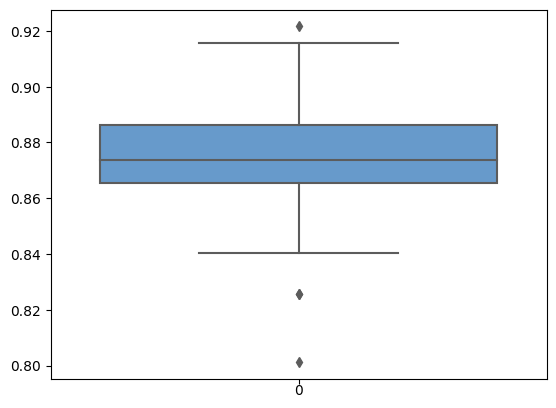

In [168]:
print(file.index.name)
sns.boxplot(F1_output, color = sns.color_palette("hls", 7)[4])

### VAE

#### VAE Setup

In [8]:
# Function set for leave one out loop
def compute_latent(x): # x:
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim), mean=0., stddev=1.0 )
    return mu + K.exp(sigma/2)*eps

# Set custom layer , will need all this at start of shell script
class CustomVariationalLayer(Layer):
    """
    Define a custom layer
    """
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x_input, x_decoded):
        reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))

    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
    
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa

    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)

#### VAE Main

##### VAE toggle templates

In [ ]:
feature_set = 'mad_5k_within'
decode_df = file
c = file.index.name
fit_on = c
super_v = '0'

In [104]:
feature_set = 'mad_5k_across'
decode_df = file
c = file.index.name
fit_on = c
super_v = 'bx_crv'

In [ ]:
feature_set = 'mad_5k_within'
decode_df = hold_in
c = file.index.name
fit_on = c
super_v = 'hold_in' 
                        # move hold-in code up here to run in order

In [107]:
decode_df

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.031385,0.009340,0.039359,0.046129,0.031442,0.018842,0.087729,0.089627,0.136415,...,0.134333,0.395323,0.211688,0.285639,0.233318,0.203803,0.242757,0.060273,0.172109,0.526240
TCGA-3C-AALI,BRCA_4,0.101237,0.030875,0.091098,0.028947,0.071486,0.053656,0.109263,0.248707,0.348832,...,0.221111,0.184540,0.200623,0.120528,0.247122,0.183697,0.128036,0.145553,0.177389,0.498367
TCGA-3C-AALJ,BRCA_2,0.102118,0.026908,0.102970,0.002073,0.069342,0.051479,0.181907,0.182647,0.358672,...,0.393196,0.162478,0.192225,0.105651,0.137341,0.162629,0.120194,0.104077,0.302681,0.230708
TCGA-3C-AALK,BRCA_1,0.245417,0.028296,0.116361,0.008146,0.195194,0.128708,0.090467,0.143409,0.321840,...,0.189172,0.163491,0.190177,0.158288,0.220929,0.145901,0.163564,0.111635,0.127003,0.270418
TCGA-4H-AAAK,BRCA_1,0.233795,0.015375,0.208902,0.004443,0.238647,0.162215,0.104993,0.140335,0.308237,...,0.115154,0.174519,0.152611,0.175450,0.228238,0.179946,0.223932,0.121891,0.173570,0.322601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,0.151985,0.008408,0.066331,0.001252,0.068486,0.067384,0.182326,0.130463,0.735460,...,0.549026,0.175498,0.160633,0.205027,0.163870,0.125576,0.083509,0.038011,0.147255,0.183957
TCGA-XX-A899,BRCA_1,0.115542,0.007113,0.087292,0.008191,0.131443,0.066699,0.097668,0.119608,0.313509,...,0.138364,0.151470,0.200950,0.204139,0.189732,0.175460,0.194509,0.100316,0.101179,0.274839
TCGA-XX-A89A,BRCA_1,0.254498,0.004876,0.150192,0.012612,0.259711,0.130643,0.217217,0.086321,0.361050,...,0.152896,0.155937,0.187217,0.139626,0.669949,0.182596,0.212924,0.099072,0.134256,0.239085


In [105]:
c

'BRCA'

#### Transfer training, converted from self-trianing  

Insertion point fot the 40 sample hold-in   <-----------

Should still work for self-training (direct decode)  
with extract embedding block from fine-tuning

In [106]:
fit_on # Train the model then fine-tune on BRCA
        # Because it only gets 40 samples 

'BRCA'

In [ ]:
hold_in

### Pre-train VAE

In [ ]:
# Train_file is later toggled from pre-train to fine-tune

In [222]:
train_file = pre_train_file
fit_c = train_file.index.name
pre_trn_c = 'NONE'
feature_set = 'mad_5k_across'
super_v = 'big_font'

In [205]:
train_file.shape

(76, 5001)

In [207]:
train_file.head(1)

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
ACC,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1,ACC_2,0.001892,0.360981,0.007364,0.00609,0.001363,0.00318,0.053166,0.163189,0.388039,...,0.113756,0.66084,0.148904,0.231164,0.0,0.326889,0.66126,0.139732,0.55744,0.127784


In [206]:
fit_c

'ACC'

In [208]:
pre_trn_c

'NONE'

In [210]:
feature_set

'mad_5k_across'

In [211]:
super_v

'big_font'

##### Pre-tune

2022-12-09 13:49:52.179793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-09 13:49:52.374791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-09 13:49:52.450209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-09 13:49:52.756562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-09 13:49:52.963053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-09 13:49:53.032009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-09 13:49:53.908682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


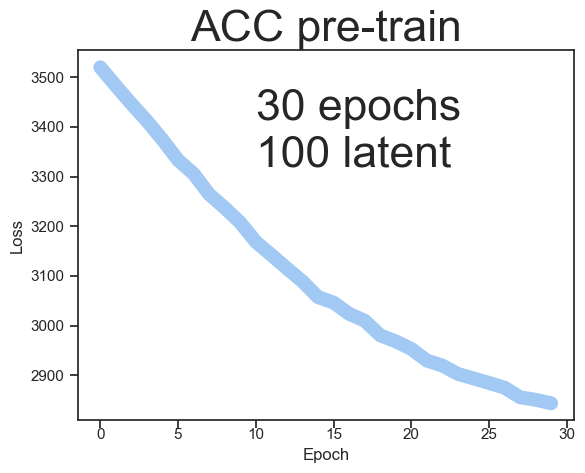

In [86]:
# Pre-train fitting with MAD 5k taken

train_file = pre_train_file
fit_c = train_file.index.name
pre_trn_c = 'NONE'
feature_set = 'mad_5k_across'
super_v = 'big_font'
fine_tune_epochs = 'NA'

features = train_file.columns[1:] # Now with pre-fit and fine-tune setup toggles

original_dim = len(features)
feature_dim = len(features)
latent_dim = 100               # Toggle here; to plot labels <--- Latent feature set diminsionality       *******

encoder_inputs = keras.Input(shape=(feature_dim,))
z_mean_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_1")(encoder_inputs)
z_mean_dense_batchnorm = layers.BatchNormalization()(z_mean_dense_linear)
z_mean_encoded = layers.Activation('relu')(z_mean_dense_batchnorm)

z_log_var_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_2")(encoder_inputs)
z_log_var_dense_batchnorm = layers.BatchNormalization()(z_log_var_dense_linear)
z_log_var_encoded = layers.Activation('relu')(z_log_var_dense_batchnorm)

latent_space = layers.Lambda(compute_latent, output_shape=(latent_dim,), name="latent_space")([z_mean_encoded, z_log_var_encoded])

decoder_to_reconstruct = layers.Dense(feature_dim, kernel_initializer='glorot_uniform', activation='sigmoid')
decoder_outputs = decoder_to_reconstruct(latent_space)

learning_rate = 0.0005
kappa = 1

beta = K.variable(0)

adam = optimizers.Adam(learning_rate=learning_rate)
vae_layer = CustomVariationalLayer()([encoder_inputs, decoder_outputs])
vae = Model(encoder_inputs, vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta]) # Take-off point from pre-training to fine-tuning

pre_train_epochs = 30 # Easy pre-train: 30, hard pre-train is 60

fit_start = time.time()
history = vae.fit(train_file.iloc[:, 1:],  #  fit the VAE on object, toggled in the setup
            epochs=pre_train_epochs, batch_size=50, shuffle=True,
            callbacks=[WarmUpCallback(beta, kappa)],
                 verbose=0 #  <---------------------- turn this on for production *************
                 )
fit_end = time.time() - fit_start

plt.plot(history.history['loss'],label="loss",linewidth = 10)

plt.title(fit_c+' pre-train', fontsize = 32
         )

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate(str(pre_train_epochs)+' epochs'+
             '\n'+str(latent_dim)+' latent',
            xy = (.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize = 32
            )

# plt.legend(loc="lower left")
plt.savefig(
    'i_o/'+itr+'/fit.'+fit_c+'.epochs.'+str(pre_train_epochs)+
    '_pre_trained_on.'+pre_trn_c+'.epochs.'+fine_tune_epochs+
    '_latent_dim.'+str(latent_dim)+'_'+ # Do not change latent dim in the middle of transfer training
    # '_pltv-'+str(plt_v)+
    # 'fitting_epochs.'+str(epochs)+'_'+
    feature_set+'_'+super_v+
    '.png', bbox_inches='tight') # version 18, norm within cohort

##### Transfer training

In [87]:
fine_tune_file = hold_in

In [128]:
hold_in.shape

(40, 5001)

Train on 40 samples
Epoch 1/100
40/40 [==============================] - 0s 10ms/sample - loss: 2813.1704
Epoch 2/100
40/40 [==============================] - 0s 799us/sample - loss: 2753.1523
Epoch 3/100
40/40 [==============================] - 0s 564us/sample - loss: 2683.6560
Epoch 4/100
40/40 [==============================] - 0s 584us/sample - loss: 2618.3232
Epoch 5/100
40/40 [==============================] - 0s 865us/sample - loss: 2561.2383
Epoch 6/100
40/40 [==============================] - 0s 592us/sample - loss: 2512.6489
Epoch 7/100
40/40 [==============================] - 0s 740us/sample - loss: 2470.2844
Epoch 8/100
40/40 [==============================] - 0s 403us/sample - loss: 2432.6919
Epoch 9/100
40/40 [==============================] - 0s 585us/sample - loss: 2399.0991
Epoch 10/100
40/40 [==============================] - 0s 461us/sample - loss: 2368.7583
Epoch 11/100
40/40 [==============================] - 0s 360us/sample - loss: 2341.3059
Epoch 12/100
40/40 [==

/Users/karlberb/miniforge3/envs/tf_M1_py3dot9/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2022-12-09 13:51:42.434277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-09 13:51:42.796560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Decode cohort trained on self using mad_5k_across feature set experiment done


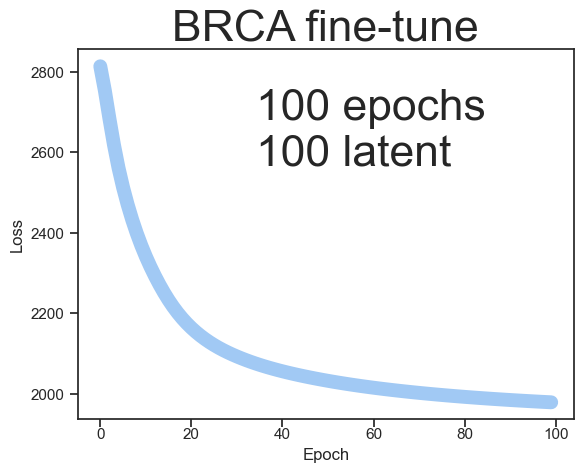

In [88]:
# Fine-tuning
# pretrain epochs variable in memory from above, latent dim also set already at this point

train_file = fine_tune_file
fit_c = train_file.index.name # Toggle cell lets reuse same VAE function with no variable toggles
pre_trn_c = pre_train_file.index.name
feature_set = 'mad_5k_across' # Always the same features, key to transfer training
super_v = 'hold_in.40'

fine_tune_epochs = 100 # Overwrite 'NA' for this variable, from above; fine-tuning easy: 100, hard: 200

fit_start = time.time()
history = vae.fit(train_file.iloc[:, 1:],  #  fit the VAE on object, toggled in the setup
            epochs = fine_tune_epochs, batch_size=50, shuffle=True,
            callbacks = [WarmUpCallback(beta, kappa)],
                 # verbose=0 #  <---------------------- turn this on for production *************
                 )

fit_end = time.time() - fit_start

plt.plot(history.history['loss'],label="loss",linewidth = 10)

plt.title(fit_c+' fine-tune', fontsize = 32
         )

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate(str(fine_tune_epochs)+' epochs'+
            '\n'+str(latent_dim)+' latent',             
            xy = (.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize = 32
            )

# plt.legend(loc="lower left")
plt.savefig(
    'i_o/'+itr+'/fit.'+fit_c+'.epochs.'+str(fine_tune_epochs)+
    '_pre_trained_on.'+pre_trn_c+'.epochs.'+str(pre_train_epochs)+
    '_latent_dim.'+str(latent_dim)+'_'+ # Do not change latent dim in the middle of transfer training
    # '_pltv-'+str(plt_v)+
    # 'fitting_epochs.'+str(epochs)+'_'+
    feature_set+'_'+super_v+
    '.png', bbox_inches='tight') # version 18, norm within cohort
# plt.close()

encoder = Model(encoder_inputs, z_mean_encoded)
decoder_input = keras.Input(shape = (latent_dim, ))
_x_decoded_mean = decoder_to_reconstruct(decoder_input)
decoder = Model(decoder_input, _x_decoded_mean)

y_df = train_file.Labels

decoded = pd.DataFrame(decoder.predict(encoder.predict(train_file.iloc[:, 1:])),
                       index = train_file.index, columns = train_file.iloc[:, 1:].columns)

latent_object = pd.DataFrame(encoder.predict(train_file.iloc[:, 1:]),
             index=train_file.index,
                # columns=decode_df.iloc[:, 1:].columns # Columns are different because this is latent space
        )
latent_object.index.name = fit_c
latent_object = pd.concat( [pd.DataFrame(y_df), latent_object] , axis =1)
latent_object.to_csv(
    'i_o/'+itr+'/fit.'+fit_c+'.epochs.'+str(fine_tune_epochs)+
    '_pre_trained_on.'+pre_trn_c+'.epochs.'+str(pre_train_epochs)+
    '_latent_object_latent_dim.'+str(latent_dim)+
    '_'+feature_set+'_'+super_v+
    '.tsv',
    sep = '\t')
# break
decoded_labeled = pd.concat( [pd.DataFrame(y_df), decoded] , axis =1)
decoded_labeled.to_csv(
    'i_o/'+itr+'/fit.'+fit_c+'.epochs.'+str(fine_tune_epochs)+
    '_pre_trained_on.'+pre_trn_c+'.epochs.'+str(pre_train_epochs)+
    '_decoded_obj_latent_dim.'+str(latent_dim)+
    '_'+feature_set+'_'+super_v+
    '.tsv',
    sep = '\t')

print('Decode cohort trained on self using '+feature_set+' feature set experiment done')

In [ ]:
fit_end

In [ ]:
# What is the latent feature dimension? - 100 (low)

##### Cut code

In [ ]:
plt.title(
    fit_c+' fit with '+pre_trn_c+' pretrain'+
    '\nTybalt VAE\n'
         )

plt.annotate('Feature set = '+feature_set+
             '\nLatent dim = '+str(latent_dim)+
             '\nLayer type = dense'+
             '\nNormalization = divide by max(),\n'+
             '                       column-wise,\n'+
             '                       within cohort'+
             '\nFit time = '+str(round(fit_end,2 ))+'s',
            xy = (.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            )

In [ ]:
# From the pre-train VAE block:

In [ ]:
# plt.close()

# encoder = Model(encoder_inputs, z_mean_encoded)
# decoder_input = keras.Input(shape=(latent_dim, ))
# _x_decoded_mean = decoder_to_reconstruct(decoder_input)
# decoder = Model(decoder_input, _x_decoded_mean)

# y_df = decode_df.Labels

# decoded = pd.DataFrame(decoder.predict(encoder.predict(decode_df.iloc[:, 1:])),
#                        index=decode_df.index, columns=decode_df.iloc[:, 1:].columns)

# latent_object = pd.DataFrame(encoder.predict(decode_df.iloc[:, 1:]),
#              index=decode_df.index,
#                 # columns=decode_df.iloc[:, 1:].columns # Columns are different because this is latent space
#         )
# latent_object.index.name = c
# latent_object = pd.concat( [pd.DataFrame(y_df), latent_object] , axis =1)
# latent_object.to_csv('i_o/'+itr+'/'+c+'_fit_on.'+fit_on+
#                      '_latent_object_latent_dim.'+str(latent_dim)+
#     '_epochs.'+str(epochs)+'_'+feature_set+'_'+super_v+
#     '.tsv',
#     sep = '\t')
# # break
# decoded_labeled = pd.concat( [pd.DataFrame(y_df), decoded] , axis =1)
# decoded_labeled.to_csv(
#     'i_o/'+itr+'/'+c+'_fit_on.'+fit_on+'_decoded_latent_dim.'+
#     str(latent_dim)+
#     '_epochs.'+str(epochs)+'_'+feature_set+'_'+super_v+
#     '.tsv',
#     sep = '\t')

# print('Decode cohort trained on self using '+feature_set+' feature set experiment done')

In [ ]:
# Ok, still on finding a good embedding feature set / classical ML / VAE transfer fitting protocol
# Next: generate seven more (really 14) training or fitting whatever combo runs to finish
# this section and then read for F1 plot
    # Already have the input F1s for all this in memory
# then repeat for the other cancers
# and do something with the latent feature sampling method, make a benchmark plot

# maybe run on this on BLCA then do the full-TCGA pre-train (?)

#### Read dec for F1 scoring

In [ ]:
# big font transfer training run

In [109]:
ls i_o/box_curve/

BRCA_fit_on.BRCA_decoded_latent_dim.50_epochs.200_mad_5k_acrossbx_crv.tsv
BRCA_fit_on.BRCA_latent_object_latent_dim.50_epochs.200_mad_5k_acrossbx_crv.tsv
BRCA_fit_on_BRCA_latent_dim.50_epochs.200_mad_5k_acrossbx_crv.png


In [110]:
dec = pd.read_csv(
    'i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.50_epochs.200_mad_5k_acrossbx_crv.tsv',
    sep = '\t', index_col = 0)

In [ ]:
# Pile-up some training files then read a bolus of decoded objects here

# this can go to an overlay 8 loss plots on a box & whiska plot

In [124]:
dec_pths = sorted(glob.glob('i_o/box_curve/BRCA_fit_on.BRCA_decoded*.tsv'))

In [ ]:
g_learning_curves/i_o/box_curve/fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.200_mad_5k_across_big_font.tsv

In [37]:
dec_pths = sorted(glob.glob('i_o/box_curve/*decoded*.tsv'))

In [38]:
len(dec_pths)

8

In [282]:
%whos

Variable                    Type                      Data/Info
---------------------------------------------------------------
Activation                  type                      <class 'keras.layers.core.activation.Activation'>
BatchNormalization          type                      <class 'keras.layers.norm<...>tion.BatchNormalization'>
Callback                    type                      <class 'keras.callbacks.Callback'>
CustomVariationalLayer      type                      <class '__main__.CustomVariationalLayer'>
DecisionTreeClassifier      ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
F1_output                   list                      n=80
F1_scr                      float64                   0.8956701947276438
K                           TFModuleWrapper           <module 'tensorflow.compa<...>ras/backend/__init__.py'>
Layer                       type                      <class 'keras.engine.base_layer.Layer'>
LogisticRegression         

In [125]:
dec_pths

['i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.150_epochs.200_mad_5k_across_bx_crv.tsv',
 'i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.150_epochs.400_mad_5k_across_bx_crv.tsv',
 'i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.250_epochs.200_mad_5k_across_bx_crv.tsv',
 'i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.250_epochs.400_mad_5k_across_bx_crv.tsv',
 'i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.350_epochs.200_mad_5k_across_bx_crv.tsv',
 'i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.350_epochs.400_mad_5k_across_bx_crv.tsv',
 'i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.50_epochs.200_mad_5k_across_bx_crv.tsv',
 'i_o/box_curve/BRCA_fit_on.BRCA_decoded_latent_dim.50_epochs.400_mad_5k_across_bx_crv.tsv']

In [39]:
dec_pths

['i_o/box_curve/fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.100_mad_5k_across_big_font.tsv',
 'i_o/box_curve/fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.200_mad_5k_across_big_font.tsv',
 'i_o/box_curve/fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.60_decoded_obj_latent_dim.100_mad_5k_across_big_font.tsv',
 'i_o/box_curve/fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.60_decoded_obj_latent_dim.200_mad_5k_across_big_font.tsv',
 'i_o/box_curve/fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.100_mad_5k_across_big_font.tsv',
 'i_o/box_curve/fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.200_mad_5k_across_big_font.tsv',
 'i_o/box_curve/fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.60_decoded_obj_latent_dim.100_mad_5k_across_big_font.tsv',
 'i_o/box_curve/fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.60_decoded_obj_latent_dim.200_mad_5k_across_big_font.tsv']

In [42]:
pth

'i_o/box_curve/fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.100_mad_5k_across_big_font.tsv'

In [43]:
pth.split('_')

['i',
 'o/box',
 'curve/fit.BRCA.epochs.100',
 'pre',
 'trained',
 'on.ACC.epochs.30',
 'decoded',
 'obj',
 'latent',
 'dim.100',
 'mad',
 '5k',
 'across',
 'big',
 'font.tsv']

In [47]:
pth.split('_')[2].split('/')[1]

'fit.BRCA.epochs.100'

In [41]:
pth.split('_')[-7]+'_'+pth.split('_')[-6]

'latent_dim.100'

In [49]:
(pth.split('_')[2].split('/')[1]+'_'+
pth.split('_')[3]+'_'+pth.split('_')[4]+'_'+pth.split('_')[5]+'_'+
pth.split('_')[-7]+'_'+pth.split('_')[-6])

'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_dim.100'

In [50]:
# This takes decoded paths

trn_tst_splts = 80
fig_stack = pd.DataFrame()
for pth in dec_pths:
    # config = pth.split('_')[-7]+'_'+pth.split('_')[-6]
    config = (pth.split('_')[2].split('/')[1]+'_'+
        pth.split('_')[3]+'_'+pth.split('_')[4]+'_'+pth.split('_')[5]+'_'+
        pth.split('_')[-7]+'_'+pth.split('_')[-6])
    # break
    dec = pd.read_csv(pth, sep = '\t', index_col = 0)

    print('Starting a quality of embedding F1 object generation run')
    # Need to track the loss plots off the back-end

    F1_output = []
    for r in list(range(0, trn_tst_splts)):
        
        X = dec.iloc[:, 1:]
        y = dec.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                    test_size=0.33,
                        )
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)

        F1_scr = f1_score(y_test, clf.predict(X_test), average='weighted')
        F1_output.append(F1_scr)

    loop_frame = pd.DataFrame(F1_output, columns = ['F1s'])
    loop_frame.insert(0, 'train_config', config)
    fig_stack = pd.concat([fig_stack, loop_frame], axis = 0)
    # break
print('Learning curve objects generated, send to concat with input')

Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Learning curve objects generated, send to concat with input


In [51]:
config

'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.60_latent_dim.200'

In [52]:
fig_stack

,train_config,F1s
0,fit.BRCA.epochs.100_pre_trained_on.ACC.epochs....,0.873706
1,fit.BRCA.epochs.100_pre_trained_on.ACC.epochs....,0.891437
2,fit.BRCA.epochs.100_pre_trained_on.ACC.epochs....,0.871375
3,fit.BRCA.epochs.100_pre_trained_on.ACC.epochs....,0.874711
4,fit.BRCA.epochs.100_pre_trained_on.ACC.epochs....,0.894751
...,...,...
75,fit.BRCA.epochs.200_pre_trained_on.ACC.epochs....,0.863366
76,fit.BRCA.epochs.200_pre_trained_on.ACC.epochs....,0.849796
77,fit.BRCA.epochs.200_pre_trained_on.ACC.epochs....,0.859274
78,fit.BRCA.epochs.200_pre_trained_on.ACC.epochs....,0.876226


In [ ]:
fig_stack

In [ ]:
# QC test

##### Failure mode diagnostics and repair

In [122]:
fig_stack.shape # 80 train, test splits by eight training runs / latent dim combos

(720, 2)

In [ ]:
# Fix extra file reads

In [ ]:
0 - 79 = 80
560 - 639 = 80 * drop this
640 - 719 = 80    
    
560 - 640

In [128]:
fig_stack.reset_index(drop=True, inplace = True)

In [129]:
fig_stack

,train_config,F1s
0,mad_5k,0.870605
1,mad_5k,0.885003
2,mad_5k,0.879481
3,mad_5k,0.861675
4,mad_5k,0.859642
...,...,...
715,mad_5k,0.836496
716,mad_5k,0.869825
717,mad_5k,0.863758
718,mad_5k,0.876711


In [130]:
fig_stack.drop(range(560,640)) # pre-flight check

,train_config,F1s
0,mad_5k,0.870605
1,mad_5k,0.885003
2,mad_5k,0.879481
3,mad_5k,0.861675
4,mad_5k,0.859642
...,...,...
715,mad_5k,0.836496
716,mad_5k,0.869825
717,mad_5k,0.863758
718,mad_5k,0.876711


In [131]:
fig_stack.drop(range(560,640), inplace=True)

In [132]:
fig_stack.head(1)

,train_config,F1s
0,mad_5k,0.870605


In [133]:
inpt_frame.head(1)

,train_config,F1s
0,MAD_5k_across,0.876333


##### Back to the run

In [135]:
inpt_frame.shape

(80, 2)

In [58]:
# Set-up for box plot   <-------   Main function to prep for auto-box plot

full_stack = pd.concat(
    [inpt_frame, fig_stack], axis = 0)

##### Color section

In [108]:
sns.color_palette("hls", 10)[2]

(0.7247999999999999, 0.86, 0.33999999999999997)

In [109]:
pal = sns.color_palette()

In [112]:
print(pal)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


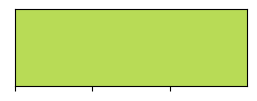

In [113]:
sns.palplot(sns.color_palette("hls", 10)[2])

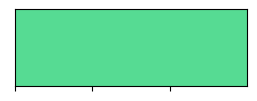

In [114]:
sns.palplot(sns.color_palette("hls", 10)[4])

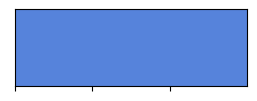

In [115]:
sns.palplot(sns.color_palette("hls", 10)[6])

In [124]:
sns.color_palette("hls", 10)[6]

(0.33999999999999997, 0.5167999999999995, 0.86)

##### Quality of embedding plot

In [60]:
full_stack

,train_config,F1s
0,MAD_5k_across,0.900117
1,MAD_5k_across,0.870943
2,MAD_5k_across,0.872404
3,MAD_5k_across,0.906403
4,MAD_5k_across,0.852206
...,...,...
75,fit.BRCA.epochs.200_pre_trained_on.ACC.epochs....,0.863366
76,fit.BRCA.epochs.200_pre_trained_on.ACC.epochs....,0.849796
77,fit.BRCA.epochs.200_pre_trained_on.ACC.epochs....,0.859274
78,fit.BRCA.epochs.200_pre_trained_on.ACC.epochs....,0.876226


In [61]:
full_stack.train_config.unique()

array(['MAD_5k_across',
       'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_dim.100',
       'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_dim.200',
       'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.60_latent_dim.100',
       'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.60_latent_dim.200',
       'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.30_latent_dim.100',
       'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.30_latent_dim.200',
       'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.60_latent_dim.100',
       'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.60_latent_dim.200'],
      dtype=object)

In [150]:
Target out:
inpt_dec_figures - pointed, check

##### Quality of embedding plot template

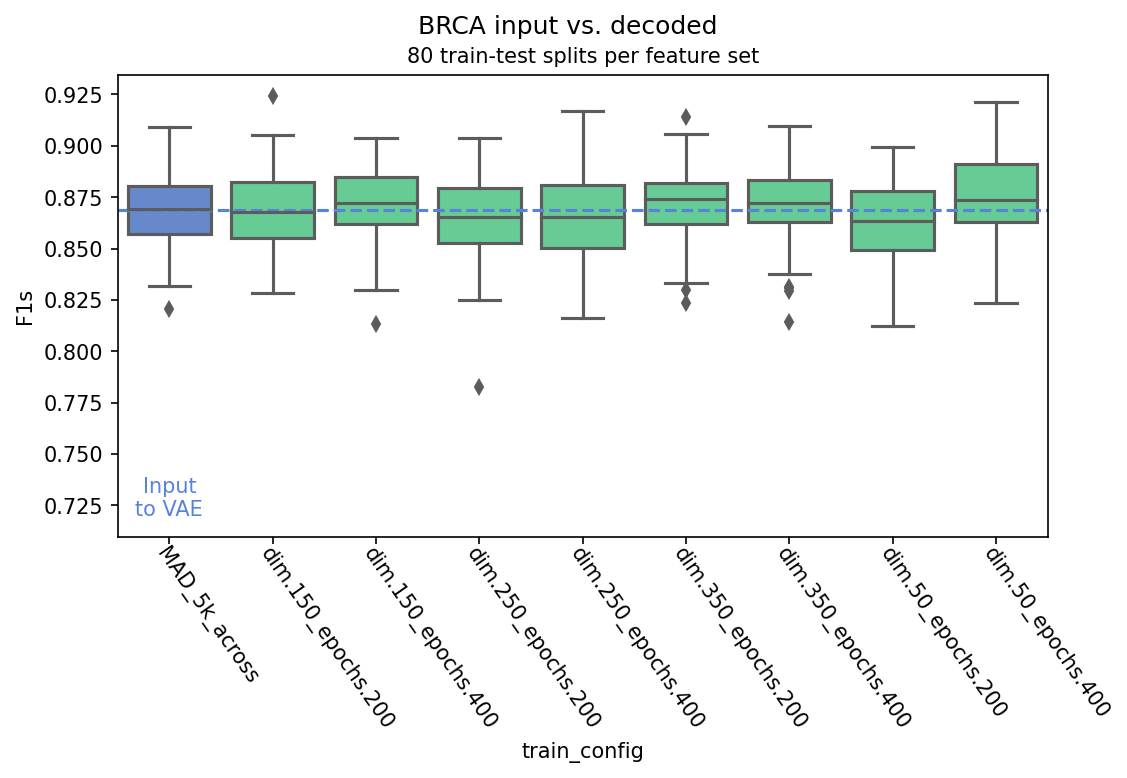

In [155]:
v_scale = .72
low_dim = '50'
high_dim = '350'
my_pal = {'MAD_5k_across': sns.color_palette("hls", 10)[6],
          'dim.150_epochs.200': sns.color_palette("hls", 10)[4],
          'dim.150_epochs.400': sns.color_palette("hls", 10)[4],
          'dim.250_epochs.200': sns.color_palette("hls", 10)[4],
          'dim.250_epochs.400': sns.color_palette("hls", 10)[4],
          'dim.350_epochs.200': sns.color_palette("hls", 10)[4],
          'dim.350_epochs.400': sns.color_palette("hls", 10)[4],
          'dim.50_epochs.200': sns.color_palette("hls", 10)[4],
          'dim.50_epochs.400': sns.color_palette("hls", 10)[4]}
figure(figsize=(8, 4), dpi=150)
ax = sns.boxplot(full_stack, x='train_config', y='F1s',
           palette = my_pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-55,
                   ha='left',
                   rotation_mode='anchor'
                  )
rcParams['xtick.major.pad']='.01'
# ax2 = ax.twinx()
plt.plot(.5, v_scale, color = 'white')
plt.plot([-.5,8.5], [inpt_frame.F1s.mean(),
                 inpt_frame.F1s.mean()], linestyle='dashed',
        color = sns.color_palette("hls", 10)[6])

plt.suptitle(file.index.name+' input vs. decoded')
plt.title(str(trn_tst_splts)+' train-test splits per feature set',
         fontsize = 10)
plt.annotate('Input\nto VAE', (-.0,v_scale),
             # fontsize = 15,
             ha = 'center',
            color = sns.color_palette("hls", 10)[6])          # blue
plt.annotate('Decoded', (.2,.1), fontsize = 15) 
plt.savefig('i_o/box_curve/inpt_dec_figures/BRCA_dim.'+low_dim+'-'+high_dim+'.png', dpi = 150, # < 
           bbox_inches = 'tight')

##### Transfer training devel

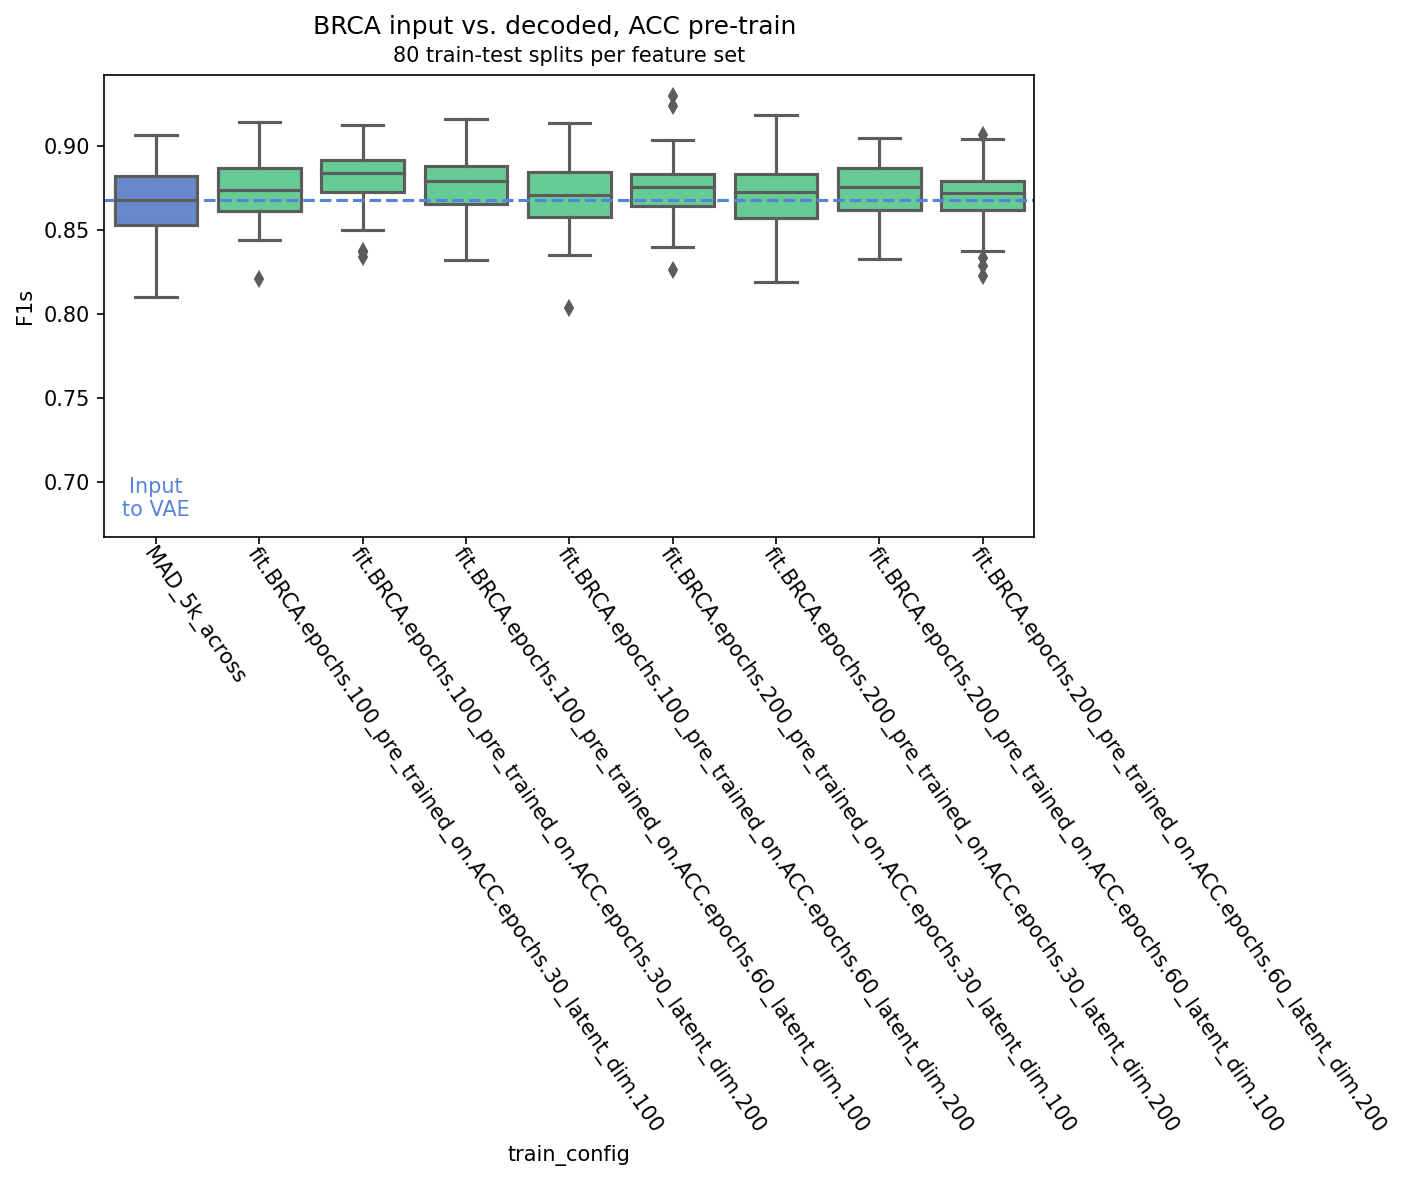

In [63]:
v_scale = .68
low_dim = '100'
high_dim = '200'
my_pal = {'MAD_5k_across': sns.color_palette("hls", 10)[6],
          'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_dim.100': sns.color_palette("hls", 10)[4],
          'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_dim.200': sns.color_palette("hls", 10)[4],
          'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.60_latent_dim.100': sns.color_palette("hls", 10)[4],
          'fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.60_latent_dim.200': sns.color_palette("hls", 10)[4],
          'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.30_latent_dim.100': sns.color_palette("hls", 10)[4],
          'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.30_latent_dim.200': sns.color_palette("hls", 10)[4],
          'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.60_latent_dim.100': sns.color_palette("hls", 10)[4],
          'fit.BRCA.epochs.200_pre_trained_on.ACC.epochs.60_latent_dim.200': sns.color_palette("hls", 10)[4]}
figure(figsize=(8, 4), dpi=150)
ax = sns.boxplot(full_stack, x='train_config', y='F1s',
           palette = my_pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-55,
                   ha='left',
                   rotation_mode='anchor'
                  )
rcParams['xtick.major.pad']='.01'
# ax2 = ax.twinx()
plt.plot(.5, v_scale, color = 'white')
plt.plot([-.5,8.5], [inpt_frame.F1s.mean(),
                 inpt_frame.F1s.mean()], linestyle='dashed',
        color = sns.color_palette("hls", 10)[6])

plt.suptitle(file.index.name+' input vs. decoded, ACC pre-train')
plt.title(str(trn_tst_splts)+' train-test splits per feature set',
         fontsize = 10)
plt.annotate('Input\nto VAE', (-.0,v_scale),
             # fontsize = 15,
             ha = 'center',
            color = sns.color_palette("hls", 10)[6])          # blue
plt.annotate('Decoded', (.2,.1), fontsize = 15) 
plt.savefig('i_o/box_curve/inpt_dec_figures/BRCA.fine_ACC.pre_dim.'+low_dim+'-'+high_dim+'.png', dpi = 150, # < 
           bbox_inches = 'tight')

In [143]:
# 2022-12-09 Friday, loss curves stiched in Google slide deck
# To the box curve section

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

#### Transfer training

In [ ]:
# Transfer learning section for finding train-on-one leads
    # Run eight epoch / latent combos per primary cross training - done
    # result will be 25 cross training figures for BRCA - not done
    
# Train-on-all TCGA - run eight epoch / latent dim combos - not done
    # This result will be one cross training figure

In [ ]:
# Start with one cohort, ACC - done
    # converted self-training above to transfer training - done
    # Will need to refer back to box_whisk for monoblock self training - done

In [ ]:
# Zone of abandonment

### Box curve

#### Notes / setup

In [ ]:
# subset the data (hold-out for validation)
    # data is 
    # A - dim 120, epochs 40
    # but now where is this data
    # And does this one training
    
    # Can use different training epoch count for pre-train and fine-tune - done
    # Choose different embedding config at each sample-sub set (?) - umm 
    
    # Choose embedding config based on sub-set of samples - okay, maybe

# Put box plot to learning curve - now

In [64]:
file

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.031385,0.009340,0.039359,0.046129,0.031442,0.018842,0.087729,0.089627,0.136415,...,0.134333,0.395323,0.211688,0.285639,0.233318,0.203803,0.242757,0.060273,0.172109,0.526240
TCGA-3C-AALI,BRCA_4,0.101237,0.030875,0.091098,0.028947,0.071486,0.053656,0.109263,0.248707,0.348832,...,0.221111,0.184540,0.200623,0.120528,0.247122,0.183697,0.128036,0.145553,0.177389,0.498367
TCGA-3C-AALJ,BRCA_2,0.102118,0.026908,0.102970,0.002073,0.069342,0.051479,0.181907,0.182647,0.358672,...,0.393196,0.162478,0.192225,0.105651,0.137341,0.162629,0.120194,0.104077,0.302681,0.230708
TCGA-3C-AALK,BRCA_1,0.245417,0.028296,0.116361,0.008146,0.195194,0.128708,0.090467,0.143409,0.321840,...,0.189172,0.163491,0.190177,0.158288,0.220929,0.145901,0.163564,0.111635,0.127003,0.270418
TCGA-4H-AAAK,BRCA_1,0.233795,0.015375,0.208902,0.004443,0.238647,0.162215,0.104993,0.140335,0.308237,...,0.115154,0.174519,0.152611,0.175450,0.228238,0.179946,0.223932,0.121891,0.173570,0.322601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,0.151985,0.008408,0.066331,0.001252,0.068486,0.067384,0.182326,0.130463,0.735460,...,0.549026,0.175498,0.160633,0.205027,0.163870,0.125576,0.083509,0.038011,0.147255,0.183957
TCGA-XX-A899,BRCA_1,0.115542,0.007113,0.087292,0.008191,0.131443,0.066699,0.097668,0.119608,0.313509,...,0.138364,0.151470,0.200950,0.204139,0.189732,0.175460,0.194509,0.100316,0.101179,0.274839
TCGA-XX-A89A,BRCA_1,0.254498,0.004876,0.150192,0.012612,0.259711,0.130643,0.217217,0.086321,0.361050,...,0.152896,0.155937,0.187217,0.139626,0.669949,0.182596,0.212924,0.099072,0.134256,0.239085


#### Input learning curve

##### Hold out / Hold in splitting

In [297]:
hold_out = file.sample(500)

In [65]:
hold_out = file.sample(40)

In [69]:
hold_in = file.sample(40)

In [298]:
hold_out.index

Index(['TCGA-S3-A6ZG', 'TCGA-D8-A1X7', 'TCGA-C8-A1HN', 'TCGA-A2-A0CU',
       'TCGA-A2-A0YI', 'TCGA-BH-A1EW', 'TCGA-A8-A06P', 'TCGA-C8-A3M7',
       'TCGA-E2-A14W', 'TCGA-S3-A6ZH',
       ...
       'TCGA-A2-A0ER', 'TCGA-A7-A4SE', 'TCGA-LL-A7T0', 'TCGA-B6-A0I5',
       'TCGA-AO-A12F', 'TCGA-A7-A6VY', 'TCGA-C8-A12P', 'TCGA-D8-A147',
       'TCGA-E2-A1B5', 'TCGA-B6-A0RO'],
      dtype='object', name='BRCA', length=500)

In [66]:
hold_out.index

Index(['TCGA-A7-A4SD', 'TCGA-E2-A15A', 'TCGA-BH-A18K', 'TCGA-E2-A1B4',
       'TCGA-A8-A095', 'TCGA-E9-A2JS', 'TCGA-E2-A1LG', 'TCGA-EW-A6SA',
       'TCGA-EW-A2FV', 'TCGA-OL-A6VO', 'TCGA-A2-A1FZ', 'TCGA-JL-A3YW',
       'TCGA-C8-A12Y', 'TCGA-E9-A3QA', 'TCGA-BH-A0BZ', 'TCGA-LL-A5YO',
       'TCGA-D8-A140', 'TCGA-BH-A0W7', 'TCGA-A2-A0CU', 'TCGA-E2-A1B1',
       'TCGA-B6-A0WV', 'TCGA-E9-A5UO', 'TCGA-E9-A1N6', 'TCGA-OL-A66J',
       'TCGA-BH-A0DG', 'TCGA-E9-A1N9', 'TCGA-LL-A440', 'TCGA-D8-A1Y0',
       'TCGA-EW-A1PE', 'TCGA-A8-A07W', 'TCGA-E2-A14S', 'TCGA-BH-A1EO',
       'TCGA-AN-A04D', 'TCGA-AC-A2QH', 'TCGA-AN-A0FN', 'TCGA-E2-A107',
       'TCGA-BH-A0GZ', 'TCGA-A8-A06O', 'TCGA-AR-A1AJ', 'TCGA-A1-A0SQ'],
      dtype='object', name='BRCA')

In [67]:
hold_out.Labels

BRCA
TCGA-A7-A4SD    BRCA_3
TCGA-E2-A15A    BRCA_2
TCGA-BH-A18K    BRCA_1
TCGA-E2-A1B4    BRCA_1
TCGA-A8-A095    BRCA_2
TCGA-E9-A2JS    BRCA_2
TCGA-E2-A1LG    BRCA_3
TCGA-EW-A6SA    BRCA_2
TCGA-EW-A2FV    BRCA_1
TCGA-OL-A6VO    BRCA_3
TCGA-A2-A1FZ    BRCA_1
TCGA-JL-A3YW    BRCA_4
TCGA-C8-A12Y    BRCA_1
TCGA-E9-A3QA    BRCA_3
TCGA-BH-A0BZ    BRCA_2
TCGA-LL-A5YO    BRCA_4
TCGA-D8-A140    BRCA_1
TCGA-BH-A0W7    BRCA_1
TCGA-A2-A0CU    BRCA_1
TCGA-E2-A1B1    BRCA_1
TCGA-B6-A0WV    BRCA_2
TCGA-E9-A5UO    BRCA_2
TCGA-E9-A1N6    BRCA_2
TCGA-OL-A66J    BRCA_1
TCGA-BH-A0DG    BRCA_1
TCGA-E9-A1N9    BRCA_3
TCGA-LL-A440    BRCA_1
TCGA-D8-A1Y0    BRCA_1
TCGA-EW-A1PE    BRCA_1
TCGA-A8-A07W    BRCA_2
TCGA-E2-A14S    BRCA_2
TCGA-BH-A1EO    BRCA_1
TCGA-AN-A04D    BRCA_3
TCGA-AC-A2QH    BRCA_3
TCGA-AN-A0FN    BRCA_1
TCGA-E2-A107    BRCA_1
TCGA-BH-A0GZ    BRCA_1
TCGA-A8-A06O    BRCA_2
TCGA-AR-A1AJ    BRCA_3
TCGA-A1-A0SQ    BRCA_1
Name: Labels, dtype: object

In [68]:
hold_in.Labels.value_counts()

BRCA_1    19
BRCA_2    11
BRCA_3     8
BRCA_4     2
Name: Labels, dtype: int64

In [70]:
hold_in.Labels.value_counts()

BRCA_1    16
BRCA_2    11
BRCA_3    10
BRCA_4     3
Name: Labels, dtype: int64

In [71]:
hold_in = file.sample(40)
hold_out = file.loc[file[~file.index.isin(hold_in.index)].index, :]

In [72]:
len(hold_out)

955

In [73]:
hold_out

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.031385,0.009340,0.039359,0.046129,0.031442,0.018842,0.087729,0.089627,0.136415,...,0.134333,0.395323,0.211688,0.285639,0.233318,0.203803,0.242757,0.060273,0.172109,0.526240
TCGA-3C-AALI,BRCA_4,0.101237,0.030875,0.091098,0.028947,0.071486,0.053656,0.109263,0.248707,0.348832,...,0.221111,0.184540,0.200623,0.120528,0.247122,0.183697,0.128036,0.145553,0.177389,0.498367
TCGA-3C-AALJ,BRCA_2,0.102118,0.026908,0.102970,0.002073,0.069342,0.051479,0.181907,0.182647,0.358672,...,0.393196,0.162478,0.192225,0.105651,0.137341,0.162629,0.120194,0.104077,0.302681,0.230708
TCGA-3C-AALK,BRCA_1,0.245417,0.028296,0.116361,0.008146,0.195194,0.128708,0.090467,0.143409,0.321840,...,0.189172,0.163491,0.190177,0.158288,0.220929,0.145901,0.163564,0.111635,0.127003,0.270418
TCGA-4H-AAAK,BRCA_1,0.233795,0.015375,0.208902,0.004443,0.238647,0.162215,0.104993,0.140335,0.308237,...,0.115154,0.174519,0.152611,0.175450,0.228238,0.179946,0.223932,0.121891,0.173570,0.322601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,0.151985,0.008408,0.066331,0.001252,0.068486,0.067384,0.182326,0.130463,0.735460,...,0.549026,0.175498,0.160633,0.205027,0.163870,0.125576,0.083509,0.038011,0.147255,0.183957
TCGA-XX-A899,BRCA_1,0.115542,0.007113,0.087292,0.008191,0.131443,0.066699,0.097668,0.119608,0.313509,...,0.138364,0.151470,0.200950,0.204139,0.189732,0.175460,0.194509,0.100316,0.101179,0.274839
TCGA-XX-A89A,BRCA_1,0.254498,0.004876,0.150192,0.012612,0.259711,0.130643,0.217217,0.086321,0.361050,...,0.152896,0.155937,0.187217,0.139626,0.669949,0.182596,0.212924,0.099072,0.134256,0.239085


##### Hold-in devel

In [331]:
len(hold_out)

500

In [307]:
~file.index.isin(hold_out.index)

array([False,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False,  True, False, False, False,
        True,  True, False, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
        True, False, False,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False,

In [ ]:
sub_samp_drug_sub[~sub_samp_drug_sub.Cell_line.isin(X.Cell_line)].Cell_line

In [309]:
file[~file.index.isin(hold_out.index)].index

Index(['TCGA-3C-AALI', 'TCGA-5L-AAT0', 'TCGA-5T-A9QA', 'TCGA-A1-A0SE',
       'TCGA-A1-A0SI', 'TCGA-A1-A0SK', 'TCGA-A1-A0SP', 'TCGA-A1-A0SQ',
       'TCGA-A2-A04Q', 'TCGA-A2-A04T',
       ...
       'TCGA-PL-A8LX', 'TCGA-PL-A8LZ', 'TCGA-S3-AA10', 'TCGA-S3-AA11',
       'TCGA-S3-AA12', 'TCGA-UL-AAZ6', 'TCGA-V7-A7HQ', 'TCGA-WT-AB44',
       'TCGA-XX-A89A', 'TCGA-Z7-A8R5'],
      dtype='object', name='BRCA', length=495)

In [310]:
hold_in = file.loc[file[~file.index.isin(hold_out.index)].index, :]

In [312]:
df_to_rf = hold_in

In [125]:
df_to_rf

NameError: name 'df_to_rf' is not defined

##### Main

In [ ]:
# Build a dataframe
# Get a nested box and whisker going

##### Nested box plot template

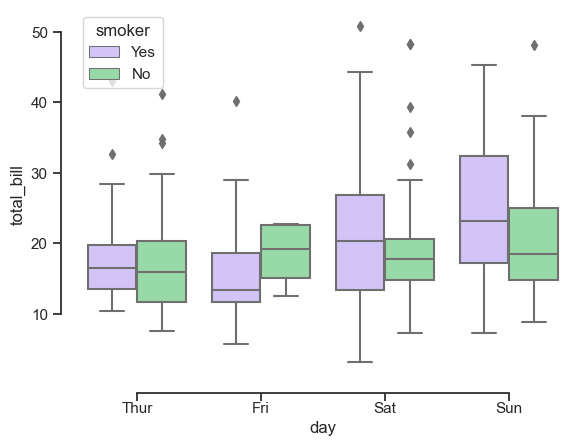

In [74]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [75]:
tips # smoker is the hue, want hue to be input, decoded, or synthetic

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# total_bill is the F1 scores - done
# day is the step size - 
# smoker (hue) this is inpt, dec, synth - 
    # generic word for this that is better than datatype
    # data status, data phase, data mode,
    # data cat (category)

In [ ]:
# Another good name for a code file: data_cat

In [ ]:
# Okay, so anyway, here is a summary from  the above: F1_score, step_size, data_cat

#### Input box F1 gen to hue frame

In [163]:
hold_in.shape

(40, 5001)

In [161]:
print('Start box curve F1')

inpt_RF_F1_frame = pd.DataFrame()
for smp_sz in list(range(10, 41, 5)): # BRCA <--- across run, plot up to 100?
    step_frame = pd.DataFrame()
    print(smp_sz)
    RF_output = []
    resmpl_count = 10 # 250
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = hold_in.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)

#     inpt_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    
#     inpt_RF_F1_dct[smp_sz] = RF_output
    # break
    step_frame['data_phase'] = ['inpt'] * 10
    step_frame['step_size'] = [smp_sz] * 10
    step_frame['F1_score'] = RF_output
    inpt_RF_F1_frame = pd.concat( [inpt_RF_F1_frame, step_frame] , axis = 0)    
print('Learning curve object generated, send to plot function')

Start box curve F1
10
15
20
25
30
35
40
Learning curve object generated, send to plot function


In [162]:
inpt_RF_F1_frame

,data_phase,step_size,F1_score
0,inpt,10,0.125000
1,inpt,10,0.642857
2,inpt,10,0.666667
3,inpt,10,0.166667
4,inpt,10,0.650000
...,...,...,...
5,inpt,40,0.490476
6,inpt,40,0.511278
7,inpt,40,0.645578
8,inpt,40,0.681509


##### Input F1 curve checks

In [84]:
inpt_RF_F1_means

{10: 0.306, 15: 0.297, 20: 0.383, 25: 0.505, 30: 0.581, 35: 0.642, 40: 0.64}

In [115]:
inpt_box_curve = pd.DataFrame(inpt_RF_F1_dct)

In [116]:
inpt_box_curve # need to insert the step sizes repeating over blocks of rows
                # then a third column for 'input'

,10,15,20,25,30,35,40
0,0.333333,0.228571,0.257143,0.396825,0.800000,0.766667,0.789286
1,0.333333,0.466667,0.476190,0.496296,0.725000,0.592424,0.656201
2,0.458333,0.000000,0.861224,0.622222,0.573333,0.516667,0.686813
3,0.650000,0.613333,0.419048,0.689459,0.230000,0.690972,0.337500
4,0.100000,0.566667,0.261905,0.535714,0.800000,0.656085,0.523810
5,0.000000,0.228571,0.214286,0.612121,0.340000,0.505037,0.738404
6,0.100000,0.000000,0.257143,0.294444,0.600000,0.514652,0.532967
7,0.333333,0.000000,0.428571,0.444444,0.466667,0.588889,0.539966
8,0.750000,0.066667,0.619048,0.516667,0.640909,0.797835,0.857143
9,0.000000,0.800000,0.035714,0.444444,0.630000,0.788194,0.742857


In [114]:
inpt_frame # this is for the embedding quality plot

,train_config,F1s
0,MAD_5k_across,0.900117
1,MAD_5k_across,0.870943
2,MAD_5k_across,0.872404
3,MAD_5k_across,0.906403
4,MAD_5k_across,0.852206
...,...,...
75,MAD_5k_across,0.825007
76,MAD_5k_across,0.842823
77,MAD_5k_across,0.875218
78,MAD_5k_across,0.876819


#### Decoded box curve

In [ ]:
ls i_o/box_whisk/

In [85]:
ls i_o/box_curve/

BRCA_direct_across_bx_crv/
fit.ACC.epochs.30_pre_trained_on.NONE.epochs.NA_latent_dim.100_mad_5k_across_big_font.png
fit.ACC.epochs.30_pre_trained_on.NONE.epochs.NA_latent_dim.200_mad_5k_across_big_font.png
fit.ACC.epochs.60_pre_trained_on.NONE.epochs.NA_latent_dim.100_mad_5k_across_big_font.png
fit.ACC.epochs.60_pre_trained_on.NONE.epochs.NA_latent_dim.200_mad_5k_across_big_font.png
fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.100_mad_5k_across_big_font.tsv
fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.200_mad_5k_across_big_font.tsv
fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_dim.100_mad_5k_across_big_font.png
fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_dim.200_mad_5k_across_big_font.png
fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_object_latent_dim.100_mad_5k_across_big_font.tsv
fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_object_latent_dim.200_mad_5k_across_big_font.tsv
fit.BRCA.epochs

In [318]:
df_to_clf = pd.read_csv(
    'i_o/box_whisk/BRCA_fit_on.BRCA_decoded_latent_dim.120_epochs.80_mad_5k_withinhold_in.tsv',
    sep = '\t', index_col = 0)

In [153]:
df_to_clf = pd.read_csv(
    'i_o/box_curve/fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_decoded_obj_latent_dim.100_mad_5k_across_hold_in.40.tsv',
    sep = '\t', index_col = 0)

In [158]:
# Superimpose dictionary 2 (decoded) samples build, version super 0, now in figure_five

# dec_RF_F1_means = {}
# dec_RF_F1_dct = {}

dec_RF_F1_frame = pd.DataFrame()

for smp_sz in list(range(10, 41, 5)): # BRCA <--- across run, mirror input steps above
    step_frame = pd.DataFrame()
    print(smp_sz)

    RF_output = []
    # resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    # dec_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    # dec_RF_F1_dct[smp_sz] = RF_output # To devel frame below
    
    step_frame['data_phase'] = ['dec'] * 10
    step_frame['step_size'] = [smp_sz] * 10
    step_frame['F1_score'] = RF_output
    dec_RF_F1_frame = pd.concat( [dec_RF_F1_frame, step_frame] , axis = 0)    
    
print('Second learning curve dictionary for superimpose plot done')

10
15
20
25
30
35
40
Second learning curve dictionary for superimpose plot done


In [159]:
dec_RF_F1_frame

,data_phase,step_size,F1_score
0,dec,10,0.500000
1,dec,10,0.125000
2,dec,10,0.200000
3,dec,10,0.666667
4,dec,10,0.333333
...,...,...,...
5,dec,40,0.840816
6,dec,40,0.361416
7,dec,40,0.520147
8,dec,40,0.597619


##### dec bx crv devel

In [ ]:
# okay, in this step the high-res output F1 frame needs to be a dataframe

In [106]:
len(dec_RF_F1_dct)

7

In [113]:
len(list(dec_RF_F1_dct.values())[0])

10

In [105]:
pd.DataFrame(dec_RF_F1_dct) # good, each row is a resampling and the columns are the step-sizes

,10,15,20,25,30,35,40
0,0.333333,0.233333,0.333333,0.292929,0.400000,0.648148,0.431378
1,0.000000,0.666667,0.607143,0.839506,0.760000,0.612500,0.840136
2,0.000000,0.133333,0.163265,0.444444,0.365714,0.286797,0.511905
3,0.400000,0.346667,0.357143,0.427778,0.516667,0.452381,0.400794
4,0.125000,0.373333,0.359184,0.274074,0.311111,0.662500,0.406349
5,0.250000,0.228571,0.714286,0.222222,0.246667,0.401587,0.542582
6,0.333333,1.000000,0.257143,0.166667,0.066667,0.166667,0.661224
7,0.125000,0.400000,0.650794,0.348148,0.533333,0.520779,0.561224
8,0.333333,0.440000,0.035714,0.181818,0.513636,0.715507,0.319139
9,0.100000,0.340000,0.265306,0.674603,0.292063,0.562698,0.437991


#### Synth learning curve  
Latent feature sampler --> synthetic TCGA gene expression sample generator

##### Data

In [321]:
chrt = 'BRCA'
latent_obj = pd.read_csv(
    'i_o/box_whisk/BRCA_fit_on.BRCA_latent_object_latent_dim.120_epochs.80_mad_5k_withinhold_in.tsv',
        sep = '\t', index_col = 0)

In [91]:
chrt = 'BRCA'

In [94]:
latent_obj = pd.read_csv(
    'i_o/box_curve/fit.BRCA.epochs.100_pre_trained_on.ACC.epochs.30_latent_object_latent_dim.100_mad_5k_across_hold_in.40.tsv',
    sep = '\t', index_col = 0)

In [97]:
latent_obj

,Labels,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T0,BRCA_3,0.000000,0.299490,0.0,1.358549,0.000000,0.000000,0.000000,0.472807,0.000000,...,0.117368,0.000000,0.000000,1.546083,0.000000,0.000000,0.000000,0.339654,0.000000,0.000000
TCGA-BH-A0B0,BRCA_1,0.396316,0.090120,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.449385,0.579447,0.000000,0.000000,1.217454,0.855243,0.000000,0.000000,0.000000,1.545216
TCGA-AC-A3QQ,BRCA_1,0.000000,0.000000,0.0,0.000000,0.337387,0.000000,0.000000,0.469391,0.000000,...,1.100745,1.401183,0.000000,0.978768,1.216263,0.000000,0.341193,0.000000,0.000000,0.000000
TCGA-E9-A1RF,BRCA_1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.011837,0.000000,0.666632,0.000000,0.000000,0.000000,0.000000
TCGA-C8-A1HI,BRCA_1,0.000000,0.000000,0.0,0.933776,0.241562,0.000000,0.000000,0.000000,0.310561,...,1.160534,0.000000,0.336940,1.096331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TCGA-AR-A1AJ,BRCA_3,0.721580,0.248701,0.0,0.000000,0.000000,0.000000,0.850411,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.480387,1.063829,0.000000,0.011910,0.000000,1.587460
TCGA-BH-A0GZ,BRCA_1,0.000000,0.000000,0.0,0.179286,0.629002,0.000000,0.000000,0.855421,0.000000,...,0.160784,0.167239,0.000000,1.027305,0.645520,0.000000,0.142128,0.000000,0.000000,0.000000
TCGA-E2-A9RU,BRCA_2,0.000000,0.000000,0.0,1.119014,1.023473,0.295929,0.000000,1.424978,0.000000,...,0.287179,1.398170,0.000000,1.419410,0.778730,0.000000,0.002932,0.000000,0.000000,1.034594
TCGA-C8-A3M7,BRCA_1,0.000000,0.000000,0.0,0.000000,0.401524,0.000000,0.128161,0.000000,0.000000,...,0.190304,0.000000,0.089681,0.000000,0.575682,0.000000,0.000000,0.000000,0.000000,1.079543


In [96]:
%whos

Variable                      Type                      Data/Info
-----------------------------------------------------------------
Activation                    type                      <class 'keras.layers.core.activation.Activation'>
BatchNormalization            type                      <class 'keras.layers.norm<...>tion.BatchNormalization'>
Callback                      type                      <class 'keras.callbacks.Callback'>
CustomVariationalLayer        type                      <class '__main__.CustomVariationalLayer'>
ExtraTreesClassifier          ABCMeta                   <class 'sklearn.ensemble.<...>st.ExtraTreesClassifier'>
F1_output                     list                      n=80
F1_scr                        float64                   0.8826922370431651
K                             TFModuleWrapper           <module 'tensorflow.compa<...>ras/backend/__init__.py'>
Layer                         type                      <class 'keras.engine.base_layer.Layer'>
Logis

In [ ]:
# Friday, 3:30 pm, want to balance the sample counts within each subtype
# Find the threshold at which to drop or keep under-sampled subtypes: Deliverable
# Also, going to toggle-off F1 per no imbalance now

In [ ]:
# idea for new notebook name: Digital cousin

In [99]:
sorted(latent_obj.Labels.unique())

['BRCA_1', 'BRCA_2', 'BRCA_3', 'BRCA_4']

##### Synth main

In [100]:
# This is the box curve 40 sample run, get it done

synth_ndx_strt = 0

synth_full_frame = pd.DataFrame() # Storage object

# Take the reset starting index position from end of loop to create next synthetic subtype set

for subtype in sorted(latent_obj.Labels.unique()): # Subset the latent feature frame on each subtype
    
    print(subtype)
    
    # break
    
    sub = latent_obj[latent_obj.Labels == subtype] # df len = 3 for BRCA 4
    synth_lat_feat_vec = []
    
    sub_len = len(sub)
    synth_sub_len = len(sub)*1  # <------ Toggle the integer at the end of this line to amplify the sample size
    
    synth_index = ['SYNTH-' + chrt + '-' + jtem for jtem in [str(
        item).zfill(5) for item in list(range(synth_ndx_strt,
                                              synth_sub_len + synth_ndx_strt))]]
    # break
    
    synth_sub_frame = pd.DataFrame(index = synth_index) # create synthetic subframe
    synth_sub_frame.insert(0, 'Labels', sub.Labels[0])
    # break
    for lat_feat in sub.columns[1:]:               # Go through the subtype latent feature set,
        # print(lat_feat)                            # skipping the Labels column
        lat_col = sub.loc[:, lat_feat] # Fuzz step (inject noise)
        
        rand_lat_feat_vals = lat_col.sample(
            # len(sub), replace = True, # <note> can toggle replacement off if taking less than number samples
            synth_sub_len, replace = True,
            # index = synth_index
        ) # *
        rand_lat_feat_vals.index = synth_index
        synth_sub_frame = pd.concat(
            [synth_sub_frame, rand_lat_feat_vals], axis = 1)
        # break
    synth_full_frame = pd.concat(
        [synth_full_frame, synth_sub_frame], axis = 0)
    # break
    
    # synth_ndx_strt = synth_ndx_strt + len(sub)
    synth_ndx_strt = synth_ndx_strt + synth_sub_len
    
    # break

BRCA_1
BRCA_2
BRCA_3
BRCA_4


In [145]:
synth_full_frame.shape  # hold in samples vs. 100 dim latent space

(40, 101)

In [129]:
# Trained decoder still in memory (usually about 5GB at this point)
synth_decoded = pd.DataFrame(decoder.predict( # note:
    synth_full_frame.iloc[:, 1:]),
        index=synth_full_frame.index, # Putting on synthetic index
            columns=hold_in.iloc[:, 1:].columns) # Putting on og columns

In [130]:
synth_decoded_labeled = pd.concat(
    [pd.DataFrame(synth_full_frame.Labels),
     synth_decoded] , axis =1)

In [326]:
df_to_clf = synth_decoded_labeled

##### Synth F1

In [151]:
# Superimpose dictionary 2 (decoded) samples build, version super 1
synth_RF_F1_frame = pd.DataFrame()
# synth_RF_F1_means = {}
    
for smp_sz in list(range(10, 41, 5)): # BRCA <--- across run, mirror input steps above
    step_frame = pd.DataFrame()
    print(smp_sz)

    RF_output = []
    
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
        # break
    # break
    # synth_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    step_frame['data_phase'] = ['synth'] * 10
    step_frame['step_size'] = [smp_sz] * 10
    step_frame['F1_score'] = RF_output
    synth_RF_F1_frame = pd.concat( [synth_RF_F1_frame, step_frame] , axis = 0)
print('BRCA dict 3 done')

10
15
20
25
30
35
40
BRCA dict 3 done


In [152]:
synth_RF_F1_frame

,data_phase,step_size,F1_score
0,synth,10,0.733333
1,synth,10,0.100000
2,synth,10,0.000000
3,synth,10,0.750000
4,synth,10,0.458333
...,...,...,...
5,synth,40,0.602041
6,synth,40,0.231746
7,synth,40,0.423469
8,synth,40,0.398475


In [329]:
df_to_clf.index.name = 'BRCA'

# Box curve

In [ ]:
# add predictions on hold-out

In [ ]:
synth_RF_F1_frame

In [164]:
box_curve_frame = pd.concat( [inpt_RF_F1_frame, dec_RF_F1_frame, synth_RF_F1_frame] , axis = 0)

In [165]:
box_curve_frame

,data_phase,step_size,F1_score
0,inpt,10,0.125000
1,inpt,10,0.642857
2,inpt,10,0.666667
3,inpt,10,0.166667
4,inpt,10,0.650000
...,...,...,...
5,synth,40,0.602041
6,synth,40,0.231746
7,synth,40,0.423469
8,synth,40,0.398475


In [167]:
df_to_clf.index.name

'BRCA'

In [169]:
fit_on = 'ACC'

In [170]:
smp_sz

40

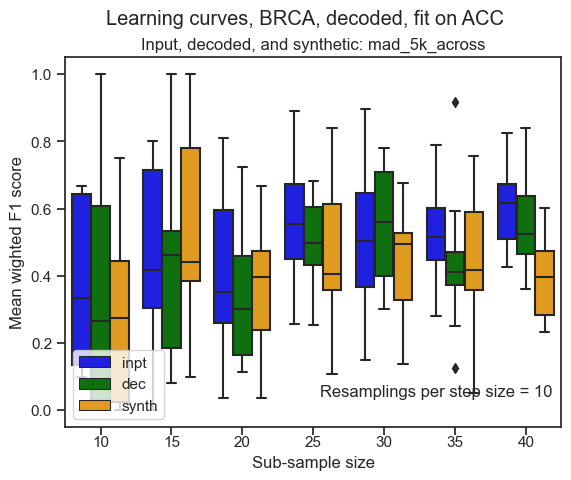

In [172]:
# Box curve - using hue function on data phase and step size
# Use a dataframe with input, decoded, and synthetic samples

sns.boxplot(x='step_size', y='F1_score',
            hue='data_phase', palette=['blue', 'green', 'orange'],
            data=box_curve_frame)

# plt.plot(list(dec_RF_F1_means.keys()),
#        dec_RF_F1_means.values(),label='decoded', color = 'green')


plt.suptitle('Learning curves, '+df_to_clf.index.name+', decoded, fit on '+
             fit_on)
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Input, decoded, and synthetic: ' + feature_set) # across or within cohorts
plt.ylabel('Mean wighted F1 score')
plt.xlabel('Sub-sample size')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.5, .2), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.legend(loc="lower left")
plt.savefig(
    'i_o/box_curve/'+
    str(df_to_clf.index.name)+'.inpt_and_dec_fit_on.'+fit_on +'_'+feature_set+'_10'+
    # str(list(inpt_RF_F1_means.keys())[0])+
    '-to-'+str(smp_sz)+
    '_'+'rsmpls.'+str(resmpl_count)+
    '_bx_crv_1.png', bbox_inches = 'tight')

##### Learning curve template

In [ ]:
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)

In [120]:
inpt_RF_F1_means

{10: 0.306, 15: 0.297, 20: 0.383, 25: 0.505, 30: 0.581, 35: 0.642, 40: 0.64}

In [121]:
dec_RF_F1_means

{10: 0.2, 15: 0.416, 20: 0.374, 25: 0.387, 30: 0.401, 35: 0.503, 40: 0.511}

In [122]:
synth_RF_F1_means

NameError: name 'synth_RF_F1_means' is not defined

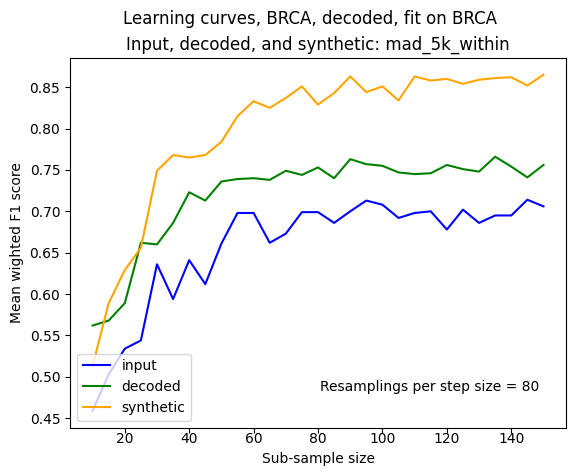

In [330]:
# Superimpose input, decoded, and synthetic, template for box curve
    # Using two dicts:
        # inpt_RF_F1_means
        # dec_RF_F1_means

plt.plot(list(inpt_RF_F1_means.keys()),
       inpt_RF_F1_means.values(),label='input', color = 'blue')
plt.plot(list(dec_RF_F1_means.keys()),
       dec_RF_F1_means.values(),label='decoded', color = 'green')
plt.plot(list(synth_RF_F1_means.keys()),
       synth_RF_F1_means.values(),label='synthetic', color = 'orange')

plt.suptitle('Learning curves, '+df_to_clf.index.name+', decoded, fit on '+
             df_to_clf.index.name)
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Input, decoded, and synthetic: ' + feature_set) # across or within cohorts
plt.ylabel('Mean wighted F1 score')
plt.xlabel('Sub-sample size')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.5, .2), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.legend(loc="lower left")
plt.savefig(
    'i_o/box_whisk/'+
    str(df_to_clf.index.name)+'.inpt_and_dec_fit_on.'+fit_on +'_'+feature_set+'_'+
    str(list(inpt_RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+
    '_'+'rsmpls.'+str(resmpl_count)+
    '_super_1_synth.png', bbox_inches = 'tight')

### Made-up data

### Hold out - Input, Decoded, and Synth

In [ ]:
hold out - done
decoded hold out - need to use trained encoder, decoder
synthetic from decoded hold out

print hold out size
print hold in size

#### Hold out Input F1 object

In [332]:
df_to_rf = hold_out

In [333]:
print('Starting Hold out input learning curve object generation')

hld_ot_inpt_RF_F1_means = {}
for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, plot up to 100?
    
    print(smp_sz)
    
    RF_output = []
    resmpl_count = 80 # 250
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_rf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)

    hld_ot_inpt_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    
    # INPUT dict - raw F1 scores for error plot <note>
    # inpt_RF_F1_dct[smp_sz] = RF_output
    # break
print('Hold-out input Learning curve object generated, send to plot function')

Starting Hold out input learning curve object generation
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
Hold-out input Learning curve object generated, send to plot function


#### Hold out Decoded F1 object

In [334]:
feature_set = 'mad_5k_within'
decode_df = hold_out
c = file.index.name
fit_on = c
super_v = '_hold-out'

In [335]:
itr

'box_whisk'

In [336]:
# No loss plot, here, not training

y_df = decode_df.Labels

decoded = pd.DataFrame(decoder.predict(encoder.predict(decode_df.iloc[:, 1:])),
                       index=decode_df.index, columns=decode_df.iloc[:, 1:].columns)

latent_object = pd.DataFrame(encoder.predict(decode_df.iloc[:, 1:]),
             index=decode_df.index,
                # columns=decode_df.iloc[:, 1:].columns # Columns are different because this is latent space
        )
latent_object.index.name = c
latent_object = pd.concat( [pd.DataFrame(y_df), latent_object] , axis =1)
latent_object.to_csv('i_o/'+itr+'/'+c+'_fit_on.'+fit_on+
                     '_latent_object_latent_dim.'+str(latent_dim)+
    '_epochs.'+str(epochs)+'_'+feature_set+super_v+
    '.tsv',
    sep = '\t')
# break
decoded_labeled = pd.concat( [pd.DataFrame(y_df), decoded] , axis =1)
decoded_labeled.to_csv(
    'i_o/'+itr+'/'+c+'_fit_on.'+fit_on+'_decoded_latent_dim.'+
    str(latent_dim)+
    '_epochs.'+str(epochs)+'_'+feature_set+super_v+
    '.tsv',
    sep = '\t')

In [337]:
df_to_clf = pd.read_csv(
    'i_o/box_whisk/BRCA_fit_on.BRCA_decoded_latent_dim.120_epochs.80_mad_5k_within_hold-out.tsv',
    sep = '\t', index_col = 0)

In [338]:
# Superimpose dictionary 2 (decoded) samples build, version super 0, now in figure_five

hld_ot_dec_RF_F1_means = {}
for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, mirror input steps above
    
    print(smp_sz)

    RF_output = []
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    hld_ot_dec_RF_F1_means[smp_sz] = round(mean(RF_output), 3)

print('Second learning curve dictionary for superimpose plot done')

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
Second learning curve dictionary for superimpose plot done


#### Synthetic from Decoded Hold out F1 object

In [339]:
chrt = 'BRCA'
latent_obj = pd.read_csv(
    'i_o/box_whisk/BRCA_fit_on.BRCA_latent_object_latent_dim.120_epochs.80_mad_5k_within_hold-out.tsv',
        sep = '\t', index_col = 0)

In [340]:
synth_ndx_strt = 0

synth_full_frame = pd.DataFrame()

for subtype in sorted(latent_obj.Labels.unique()):
    print(subtype)
    
    sub = latent_obj[latent_obj.Labels == subtype]
    synth_lat_feat_vec = []
    
    sub_len = len(sub)
    synth_sub_len = len(sub)*2
    
    synth_index = ['SYNTH-' + chrt + '-' + jtem for jtem in [str(
        item).zfill(5) for item in list(range(synth_ndx_strt,
                                              synth_sub_len + synth_ndx_strt))]]
    
    synth_sub_frame = pd.DataFrame(index = synth_index)
    synth_sub_frame.insert(0, 'Labels', sub.Labels[0])

    for lat_feat in sub.columns[1:]:

        lat_col = sub.loc[:, lat_feat]
        
        rand_lat_feat_vals = lat_col.sample(

            synth_sub_len, replace = True,

        )
        rand_lat_feat_vals.index = synth_index
        synth_sub_frame = pd.concat(
            [synth_sub_frame, rand_lat_feat_vals], axis = 1)

    synth_full_frame = pd.concat(
        [synth_full_frame, synth_sub_frame], axis = 0)
    synth_ndx_strt = synth_ndx_strt + synth_sub_len

BRCA_1
BRCA_2
BRCA_3
BRCA_4


In [341]:
synth_full_frame

,Labels,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
SYNTH-BRCA-00000,BRCA_1,0.305943,0.000000,1.012343,1.511696,1.927185,0.000000,1.368401,0.000000,0.000000,...,1.069443,0.193796,0.347717,0.000000,0.000000,0.312956,0.642466,0.475284,0.819861,0.555516
SYNTH-BRCA-00001,BRCA_1,0.000000,0.618625,0.431357,0.623724,0.000000,0.000000,0.291508,0.000000,0.000000,...,1.293553,0.000000,0.000000,0.000000,0.000000,0.589808,0.848942,1.477199,0.137750,0.594626
SYNTH-BRCA-00002,BRCA_1,0.000000,1.963241,0.000000,0.810918,0.000000,0.000000,0.000000,0.030998,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.971468,0.154200,0.957616,0.731654,0.195305,1.340720
SYNTH-BRCA-00003,BRCA_1,0.794886,0.286624,1.639823,1.502412,0.472589,0.000000,0.000000,0.402419,0.000000,...,0.000000,1.271559,0.000000,0.000000,0.000000,0.671997,2.120403,0.149687,0.344697,0.000000
SYNTH-BRCA-00004,BRCA_1,0.890828,1.963241,1.533001,1.281164,0.323941,2.469091,0.478906,0.000000,0.000000,...,0.684412,1.413718,0.000000,0.000000,1.286682,0.022155,0.000000,0.032499,0.000000,2.125566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYNTH-BRCA-00995,BRCA_4,0.000000,0.857365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.794510,...,0.000000,0.471138,0.000000,0.846612,1.332895,0.000000,0.815193,0.000000,0.000000,0.298652
SYNTH-BRCA-00996,BRCA_4,0.000000,1.194510,0.000000,0.000000,0.000000,0.571467,0.473491,0.965749,1.390114,...,0.499132,0.676084,0.561972,0.429470,0.000000,0.000000,0.000000,0.000000,1.337866,0.685839
SYNTH-BRCA-00997,BRCA_4,0.000000,0.000000,0.000000,0.000000,0.000000,1.416160,0.308208,0.000000,3.432365,...,0.018207,0.000000,0.000000,0.154154,0.000000,0.000000,0.641849,0.267730,1.838134,0.000000
SYNTH-BRCA-00998,BRCA_4,0.000000,0.975253,0.000000,0.000000,0.000000,1.808364,0.124006,0.004676,2.521417,...,1.110237,0.000000,0.000000,0.000000,0.000000,0.000000,0.877178,0.000000,0.083407,2.452142


In [342]:
synth_decoded = pd.DataFrame(decoder.predict(
    synth_full_frame.iloc[:, 1:]),
        index=synth_full_frame.index,
            columns=decode_df.iloc[:, 1:].columns)
synth_decoded_labeled = pd.concat(
    [pd.DataFrame(synth_full_frame.Labels),
     synth_decoded] , axis =1)
df_to_clf = synth_decoded_labeled

In [343]:
# Hold out synthetic, object 6 for Hold-out plot

hld_ot_synth_RF_F1_means = {}
    
for smp_sz in list(range(10, 151, 5)):
    print(smp_sz)
    RF_output = []
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    hld_ot_synth_RF_F1_means[smp_sz] = round(mean(RF_output), 3)

print('BRCA hold out dict 3 done')

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
BRCA hold out dict 3 done


In [345]:
df_to_clf.index.name = 'BRCA'

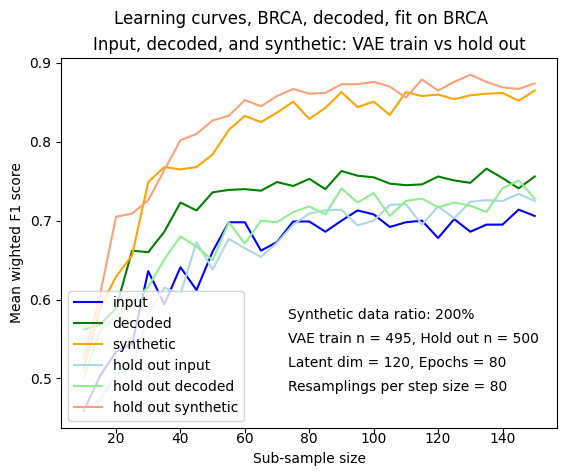

In [350]:
plt.plot(list(inpt_RF_F1_means.keys()),
       inpt_RF_F1_means.values(),label='input', color = 'blue')
plt.plot(list(dec_RF_F1_means.keys()),
       dec_RF_F1_means.values(),label='decoded', color = 'green')
plt.plot(list(synth_RF_F1_means.keys()),
       synth_RF_F1_means.values(),label='synthetic', color = 'orange')

plt.plot(list(hld_ot_inpt_RF_F1_means.keys()),
       hld_ot_inpt_RF_F1_means.values(),label='hold out input', color = 'lightblue')
plt.plot(list(hld_ot_dec_RF_F1_means.keys()),
       hld_ot_dec_RF_F1_means.values(),label='hold out decoded', color = 'lightgreen')
plt.plot(list(hld_ot_synth_RF_F1_means.keys()),
       hld_ot_synth_RF_F1_means.values(),label='hold out synthetic', color = 'lightsalmon')

plt.suptitle('Learning curves, '+df_to_clf.index.name+', decoded, fit on '+
             df_to_clf.index.name)
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Input, decoded, and synthetic: VAE train vs hold out') # across or within cohorts
plt.ylabel('Mean wighted F1 score')
plt.xlabel('Sub-sample size')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.45, .2), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

plt.annotate('VAE train n = 495, Hold out n = 500',
                xy=(.45, .3), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

plt.annotate('Latent dim = 120, Epochs = 80',
                xy=(.45, .25), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

plt.annotate('Synthetic data ratio: 200%',
                xy=(.45, .35), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

plt.legend(loc="lower left")
plt.savefig(
    'i_o/box_whisk/'+
    str(df_to_clf.index.name)+'.inpt_and_dec_fit_on.'+fit_on +'_'+feature_set+'_'+
    str(list(inpt_RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+
    '_'+'rsmpls.'+str(resmpl_count)+
    '_super_1_synth_hold_out.png', bbox_inches = 'tight')

### Box curve archive

In [ ]:
# Input template

print('starting learning curve generation on labled feature set')
# inpt_RF_F1_dct = {}

inpt_RF_F1_means = {}
# for smp_sz in list(range(10, 70, 5)): # UVM <--- across run, plot up to 100?
for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, plot up to 100?
# for smp_sz in list(range(15, 76, 5)): # ACC <---
    
    print(smp_sz)
    
    RF_output = []
    resmpl_count = 80 # 250
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_rf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)

    inpt_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    
    # INPUT dict - raw F1 scores for error plot <note>
    # inpt_RF_F1_dct[smp_sz] = RF_output
    # break
print('Learning curve object generated, send to plot function')

In [ ]:
# Superimpose dictionary 2 (decoded) samples build, version super 0, now in figure_five

dec_RF_F1_means = {}
dec_RF_F1_dct = {}

for smp_sz in list(range(10, 41, 5)): # BRCA <--- across run, mirror input steps above
    
    print(smp_sz)

    RF_output = []
    # resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    dec_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    dec_RF_F1_dct[smp_sz] = RF_output
print('Second learning curve dictionary for superimpose plot done')

In [ ]:
# Synthetic sample generator template

synth_ndx_strt = 0

synth_full_frame = pd.DataFrame() # Storage object

# Take the reset starting index position from end of loop to create next synthetic subtype set

for subtype in sorted(latent_obj.Labels.unique()): # Subset the latent feature frame on each subtype
    
    print(subtype)
    
    # break
    
    sub = latent_obj[latent_obj.Labels == subtype]
    synth_lat_feat_vec = []
    
    sub_len = len(sub)
    synth_sub_len = len(sub)*1
    
    synth_index = ['SYNTH-' + chrt + '-' + jtem for jtem in [str(
        item).zfill(5) for item in list(range(synth_ndx_strt,
                                              synth_sub_len + synth_ndx_strt))]]
    # break
    
    synth_sub_frame = pd.DataFrame(index = synth_index) # create synthetic subframe
    synth_sub_frame.insert(0, 'Labels', sub.Labels[0])
    # break
    for lat_feat in sub.columns[1:]:               # Go through the subtype latent feature set,
        # print(lat_feat)                            # skipping the Labels column
        lat_col = sub.loc[:, lat_feat]
        
        rand_lat_feat_vals = lat_col.sample(
            # len(sub), replace = True, # <note> can toggle replacement off if taking less than number samples
            synth_sub_len, replace = True,
            # index = synth_index
        ) # *
        rand_lat_feat_vals.index = synth_index
        synth_sub_frame = pd.concat(
            [synth_sub_frame, rand_lat_feat_vals], axis = 1)
        # break
    synth_full_frame = pd.concat(
        [synth_full_frame, synth_sub_frame], axis = 0)
    # break
    
    # synth_ndx_strt = synth_ndx_strt + len(sub)
    synth_ndx_strt = synth_ndx_strt + synth_sub_len
    
    # break

In [ ]:
# Synthtic learing curve template for box curve, above

# dec_RF_F1_means = {}
synth_RF_F1_means = {}
# for smp_sz in list(range(10, 70, 5)): # UVM <--- figure_five, run 1
# for smp_sz in list(range(10, 145, 5)): # UVM <--- figure_five, run 2, this dict will be a different length! 
    
for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, mirror input steps above
    
    print(smp_sz)

    RF_output = []
    # resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    synth_RF_F1_means[smp_sz] = round(mean(RF_output), 3)

print('BRCA dict 3 done')